In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.preprocessing import scale

from data_cube import DataCube
from ssm import SSM
from similarity_network_fusion import SNF

In [2]:
from tslearn.metrics import dtw, dtw_path

In [3]:
dc = DataCube(
    subjects="all",
    gestures=["2"],
    channels=["4", "6"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(300, 20)
dc.normalize_modalities(smooth=True)

---

subject 30; gesture 2_0_1


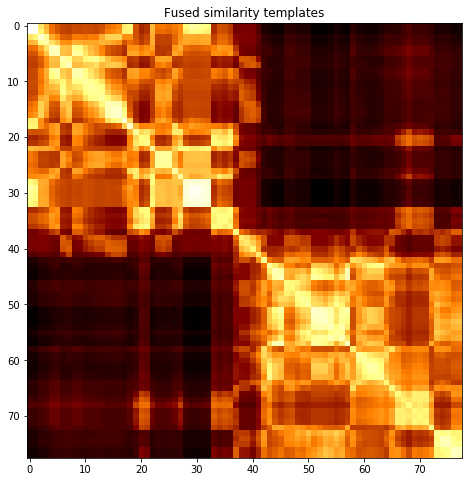

subject 30; gesture 2_0_2


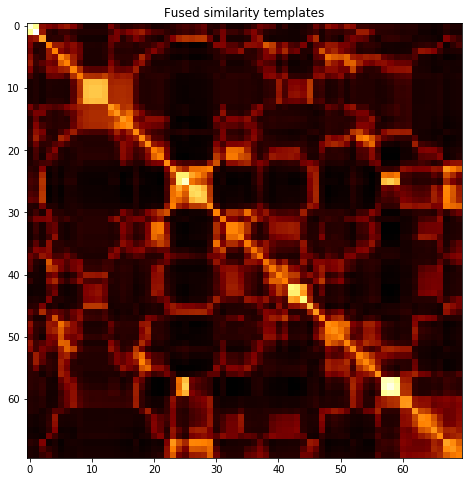

subject 30; gesture 2_1_2


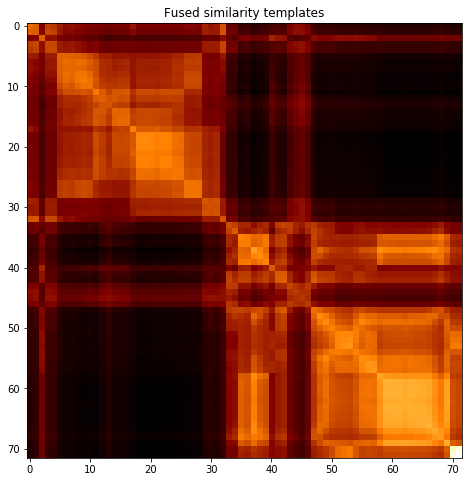

subject 30; gesture 2_1_1


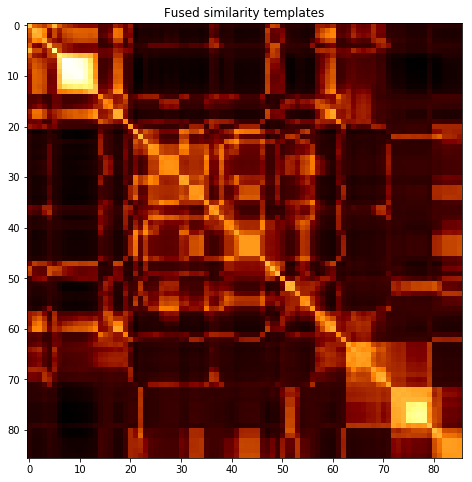

subject 06; gesture 2_0_1


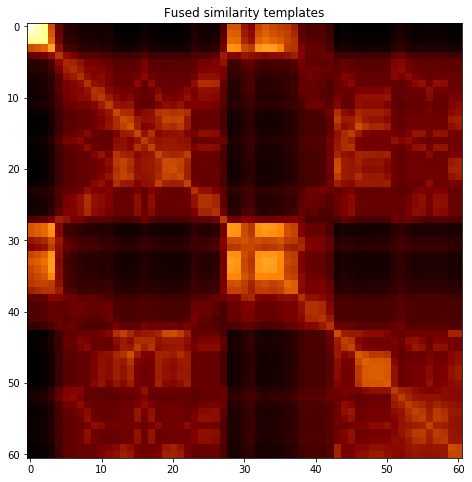

subject 06; gesture 2_0_2


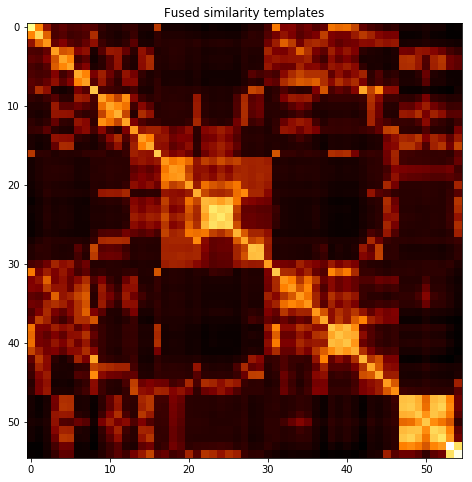

subject 06; gesture 2_1_2


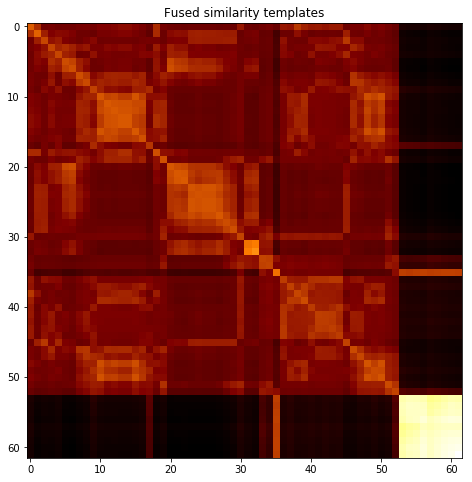

subject 06; gesture 2_1_1


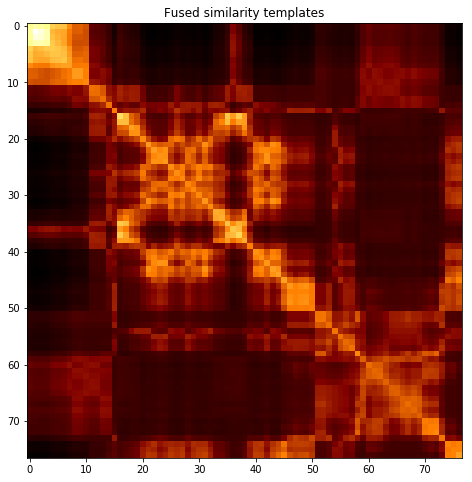

subject 09; gesture 2_0_1


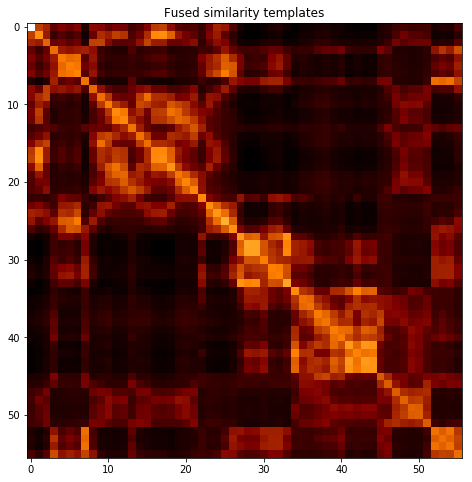

subject 09; gesture 2_0_2


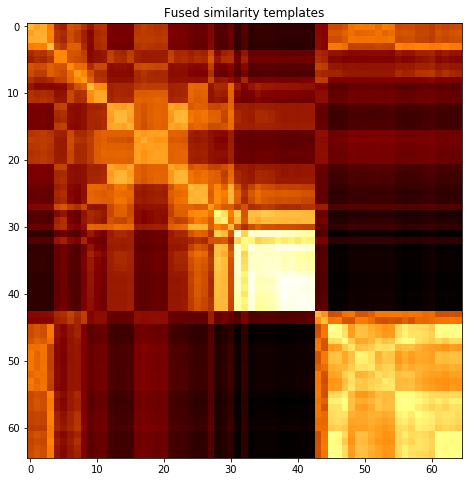

subject 09; gesture 2_1_2


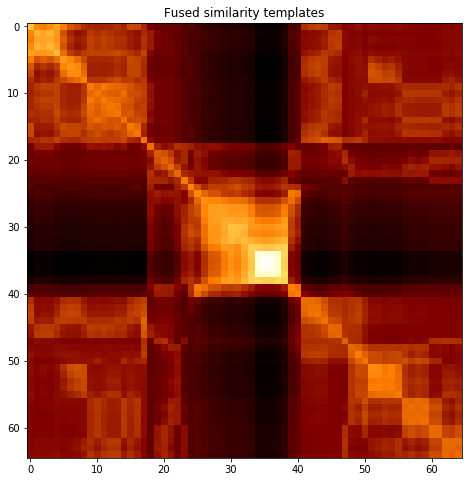

subject 09; gesture 2_1_1


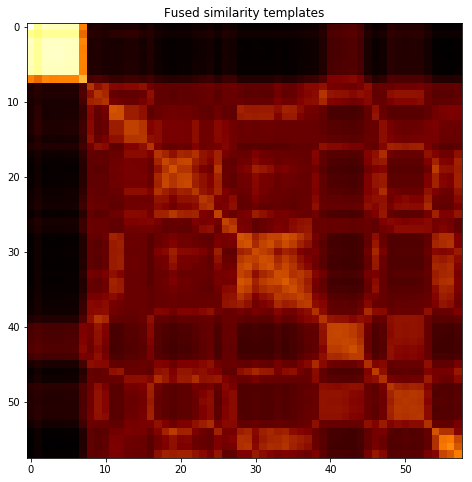

subject 03; gesture 2_0_1


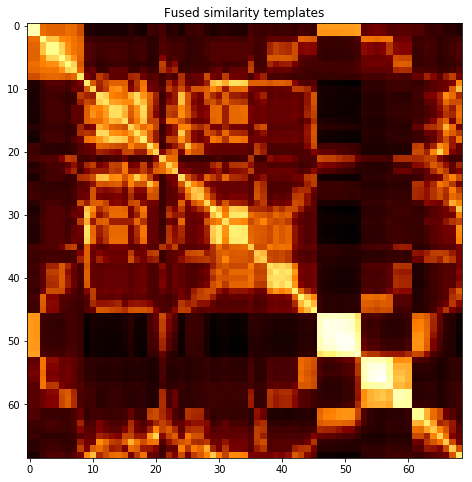

subject 03; gesture 2_0_2


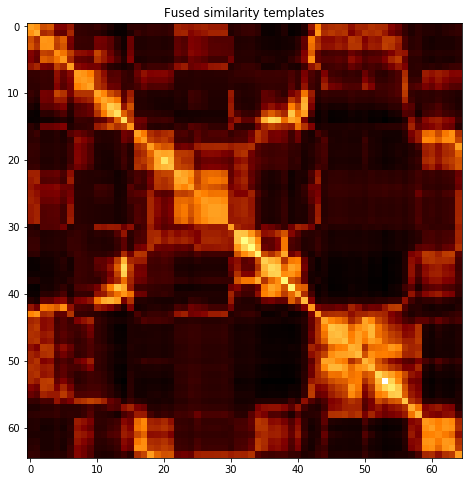

subject 03; gesture 2_1_2


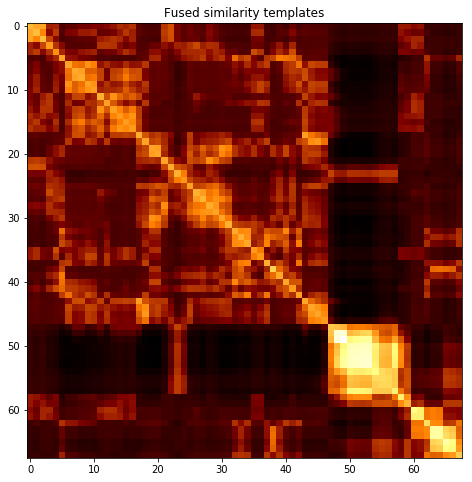

subject 03; gesture 2_1_1


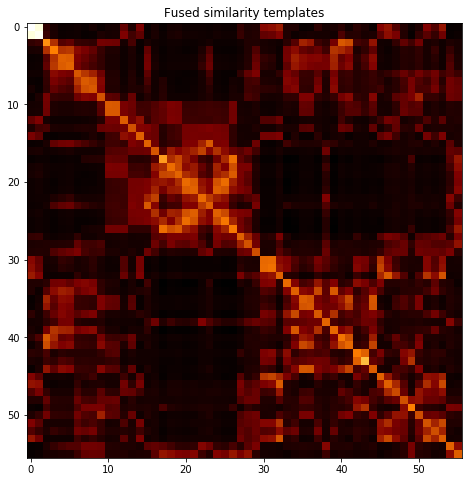

subject 05; gesture 2_0_1


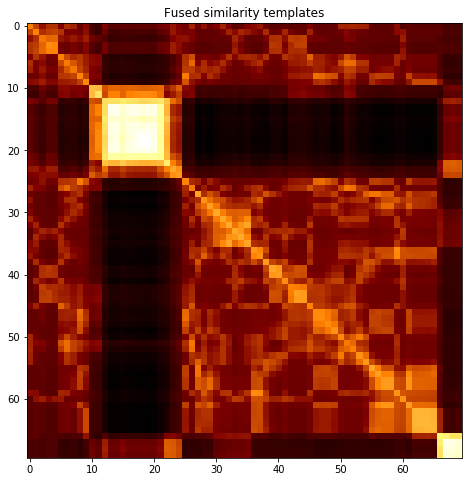

subject 05; gesture 2_0_2


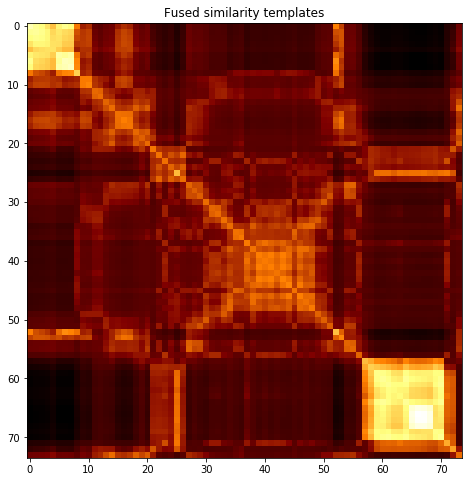

subject 05; gesture 2_1_2


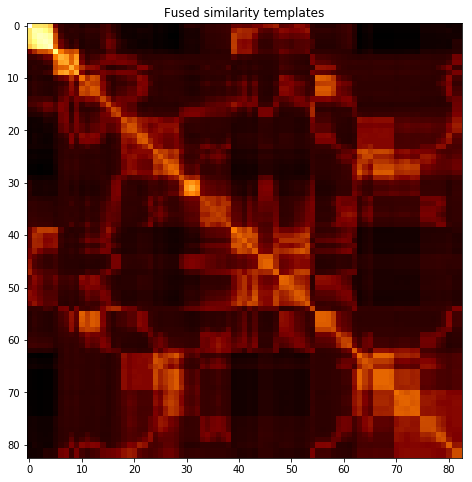

subject 05; gesture 2_1_1


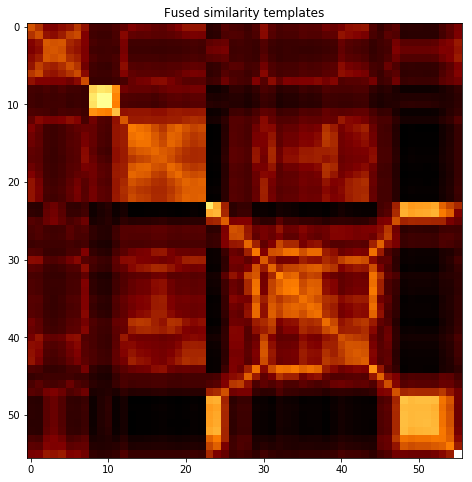

subject 21; gesture 2_0_1


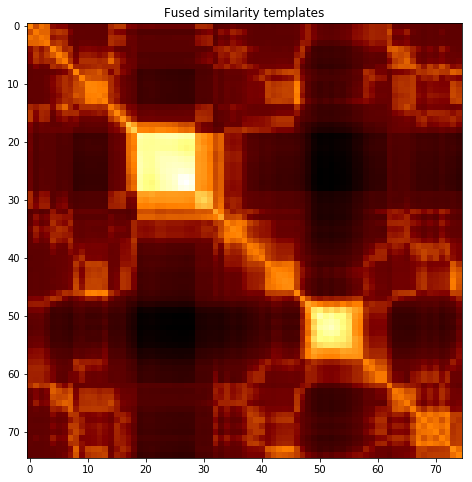

subject 21; gesture 2_0_2


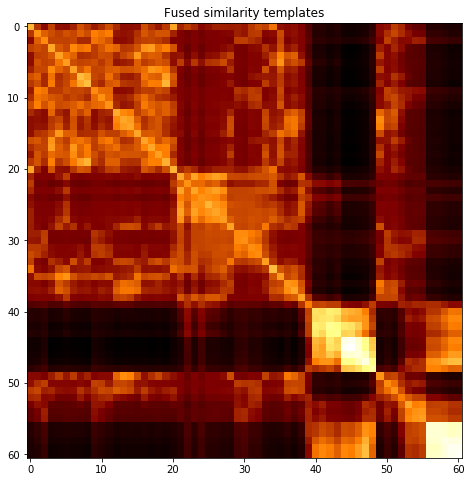

subject 21; gesture 2_1_2


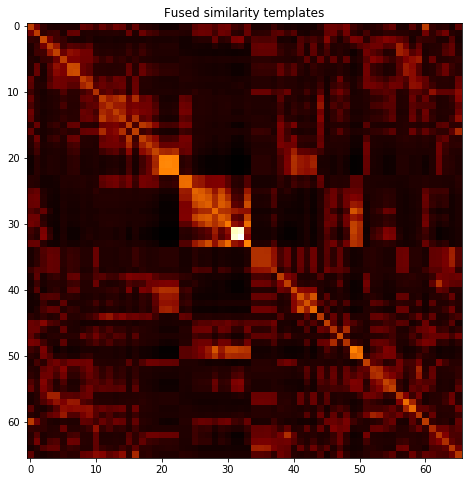

subject 21; gesture 2_1_1


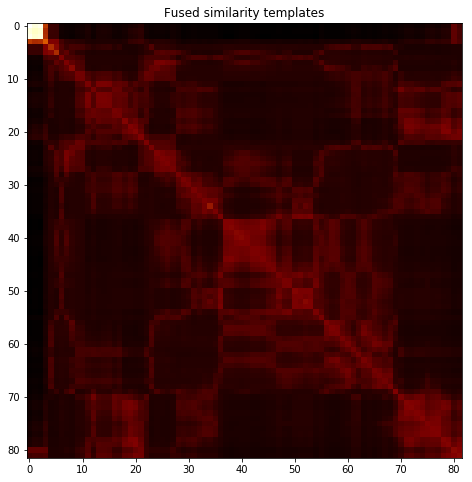

subject 17; gesture 2_0_1


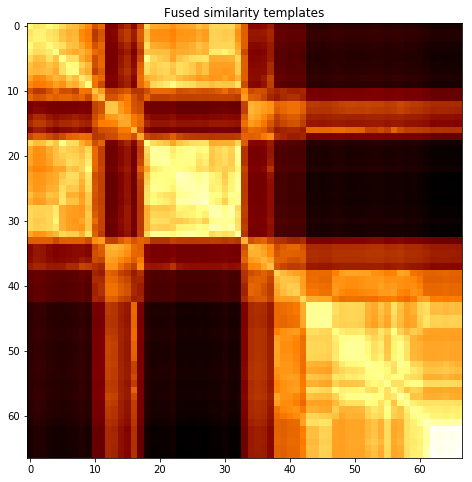

subject 17; gesture 2_0_2


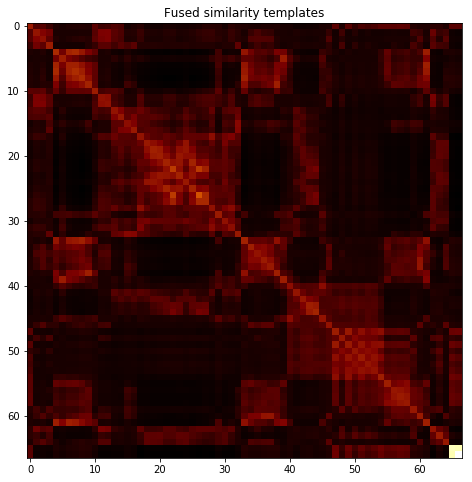

subject 17; gesture 2_1_2


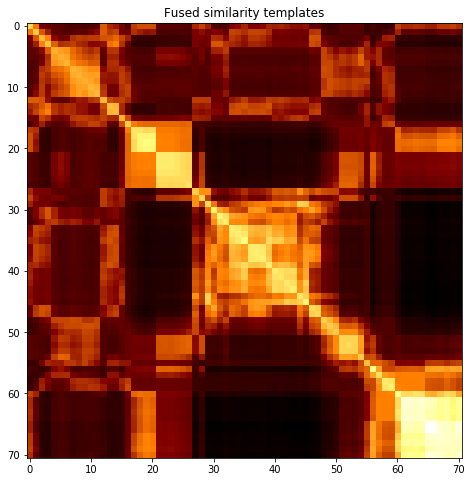

subject 17; gesture 2_1_1


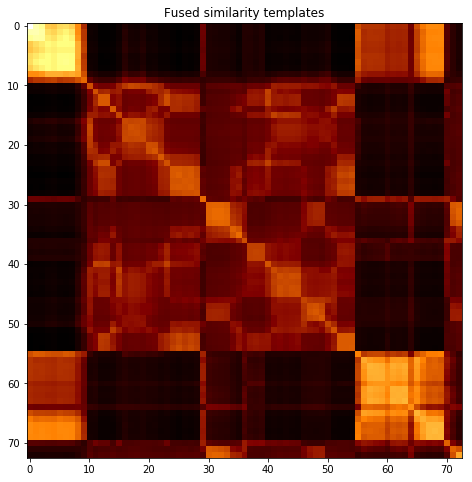

subject 01; gesture 2_0_1


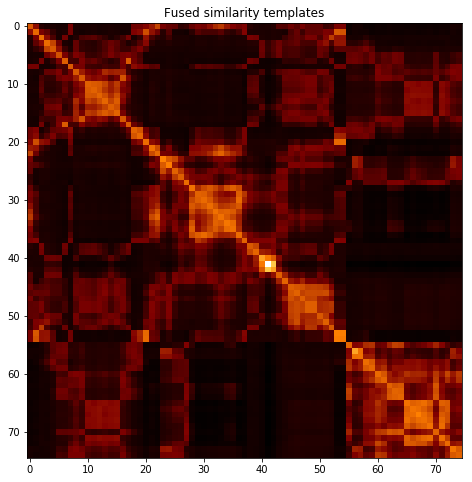

subject 01; gesture 2_0_2


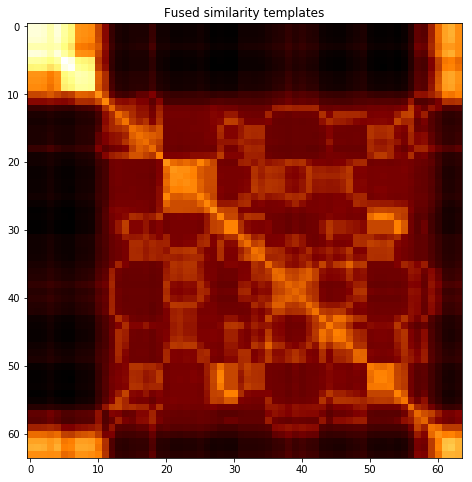

subject 01; gesture 2_1_2


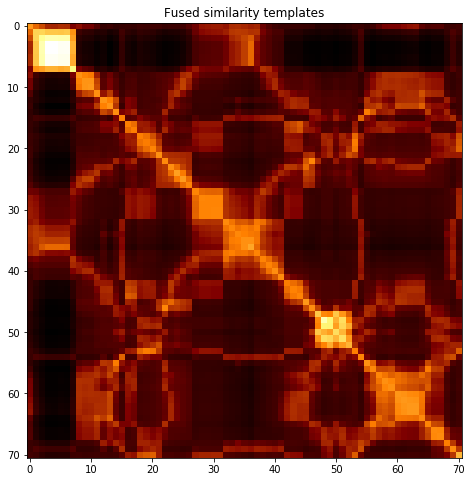

subject 01; gesture 2_1_1


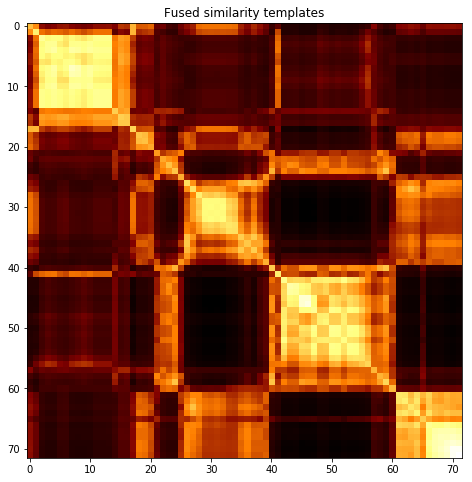

subject 16; gesture 2_0_1


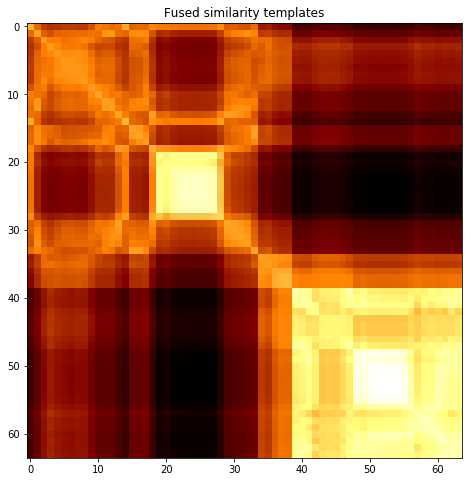

subject 16; gesture 2_0_2


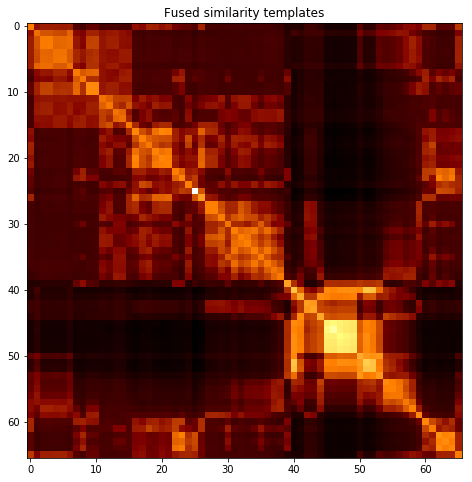

subject 16; gesture 2_1_2


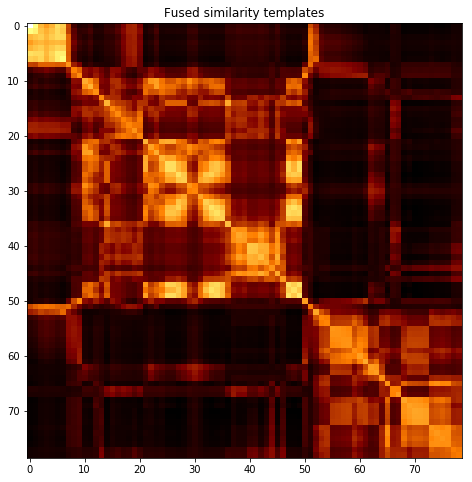

subject 16; gesture 2_1_1


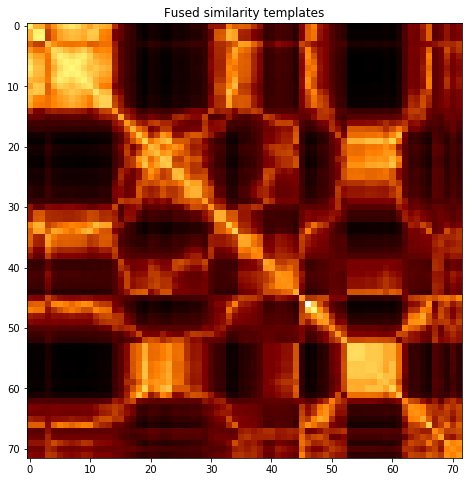

subject 26; gesture 2_0_1


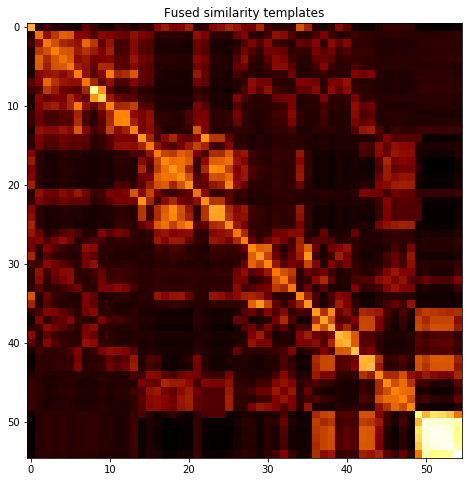

subject 26; gesture 2_0_2


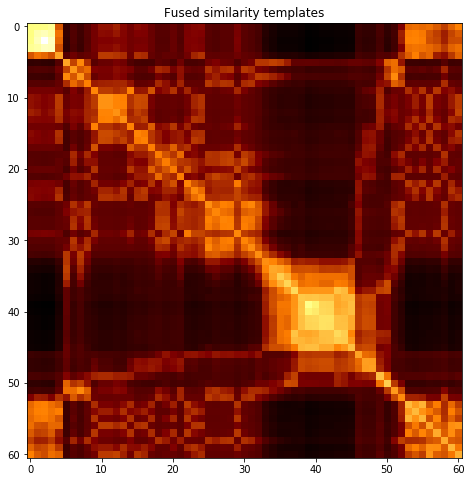

subject 26; gesture 2_1_2


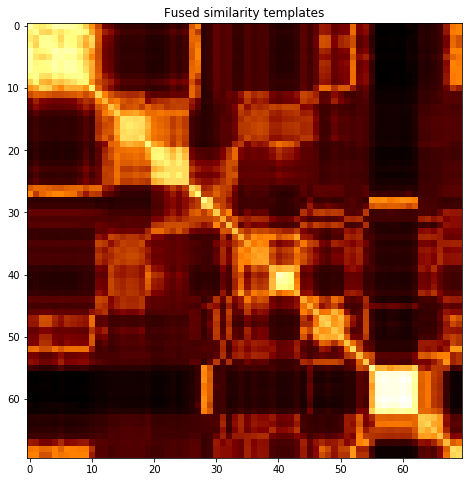

subject 26; gesture 2_1_1


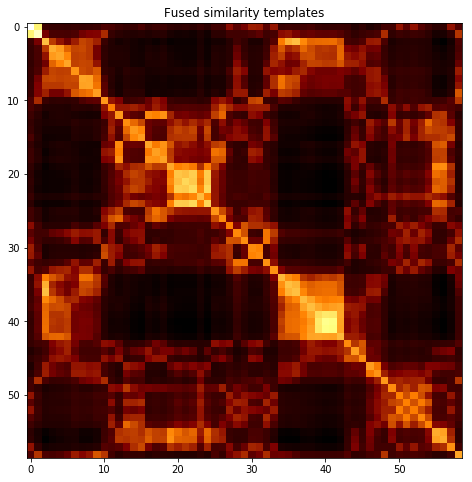

subject 32; gesture 2_0_1


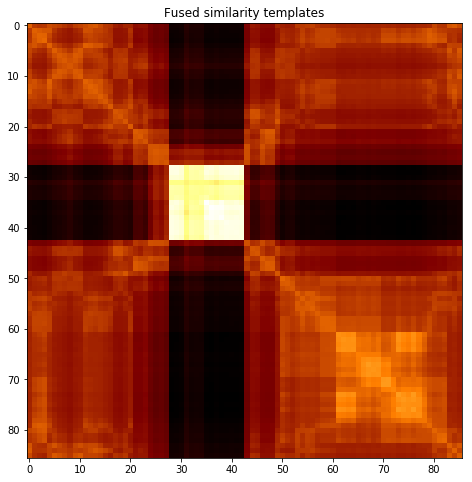

subject 32; gesture 2_0_2


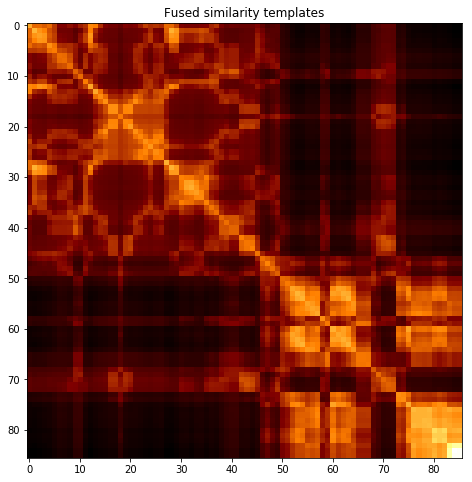

subject 32; gesture 2_1_2


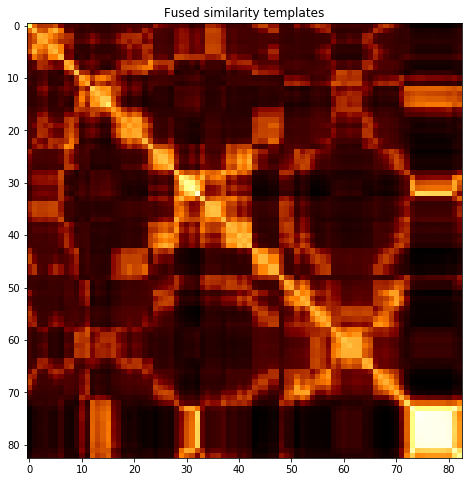

subject 32; gesture 2_1_1


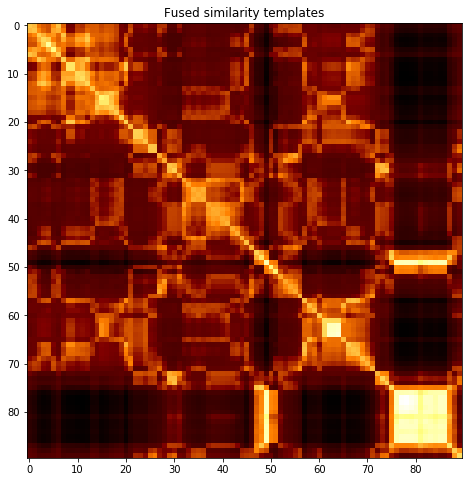

subject 04; gesture 2_0_1


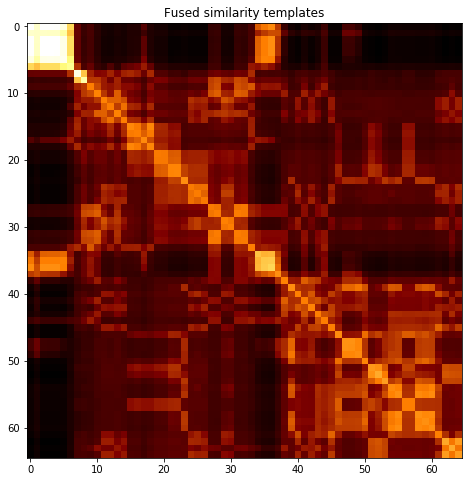

subject 04; gesture 2_0_2


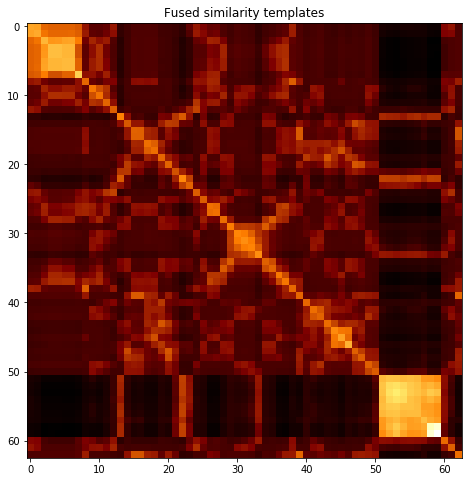

subject 04; gesture 2_1_2


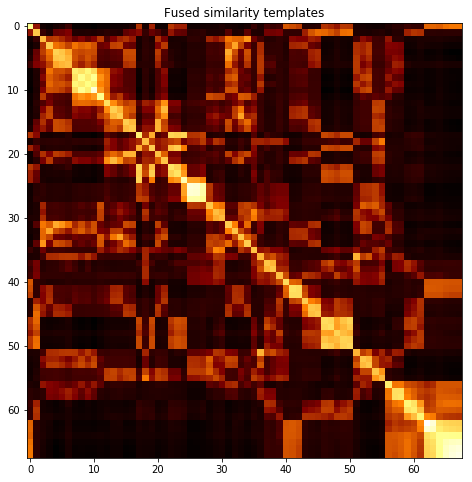

subject 04; gesture 2_1_1


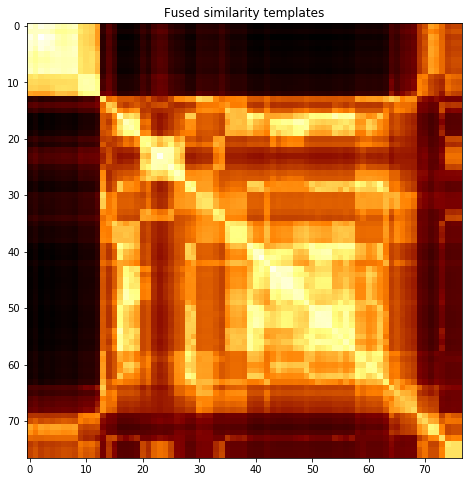

subject 08; gesture 2_0_1


subject 08; gesture 2_0_2


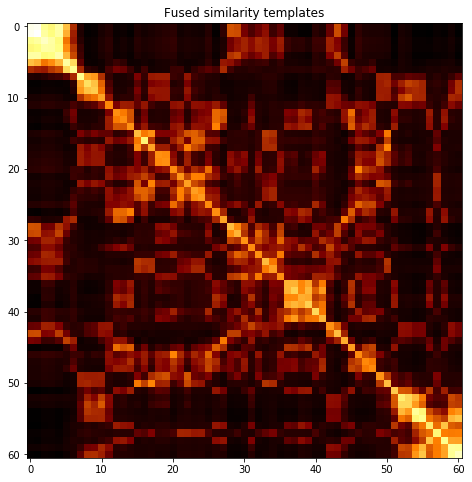

subject 08; gesture 2_1_2


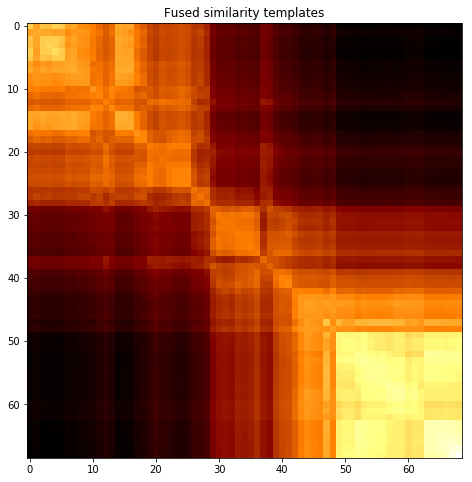

subject 08; gesture 2_1_1


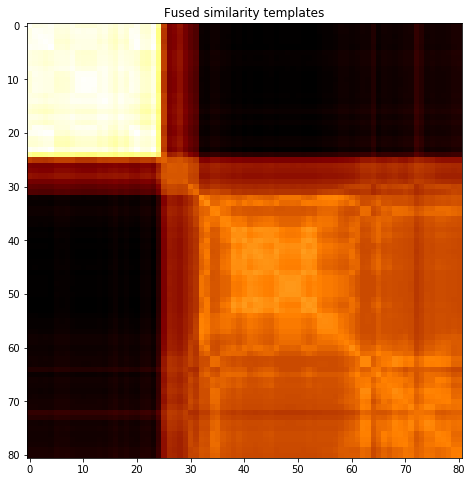

subject 27; gesture 2_0_1


subject 27; gesture 2_0_2


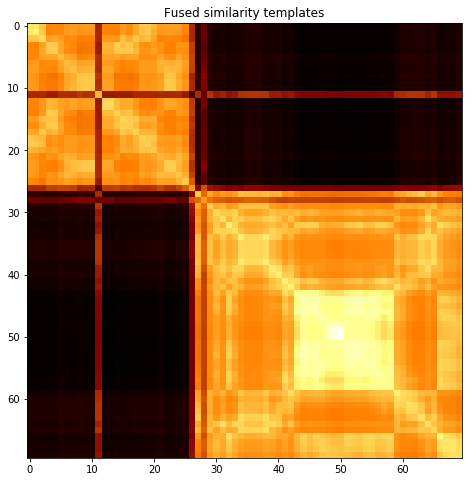

subject 27; gesture 2_1_2


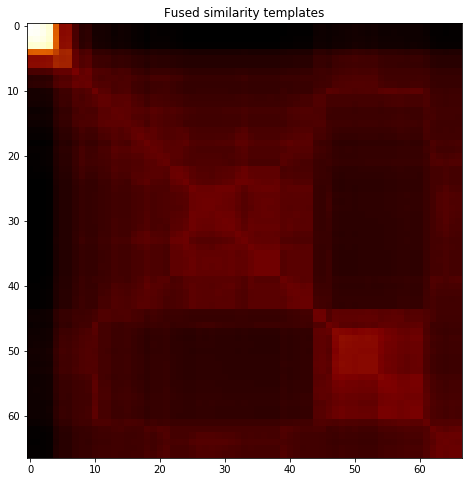

subject 27; gesture 2_1_1


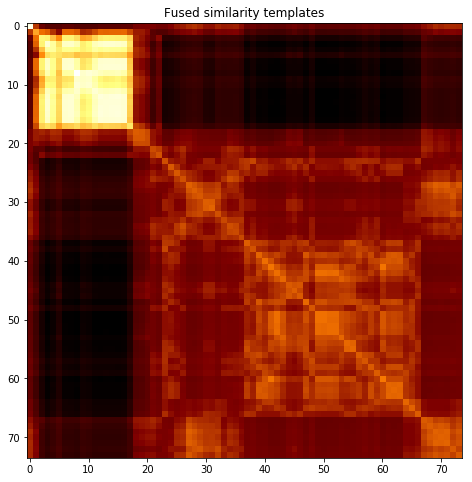

subject 14; gesture 2_0_1


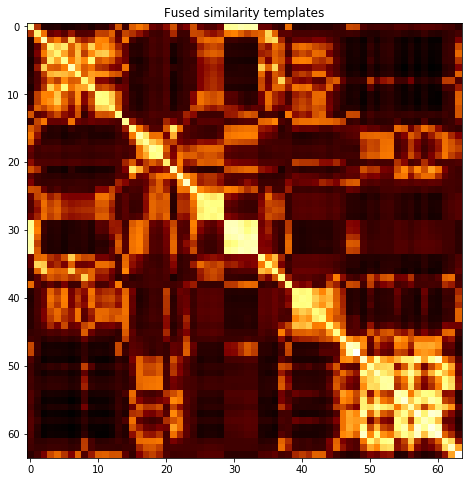

subject 14; gesture 2_0_2


subject 14; gesture 2_1_2


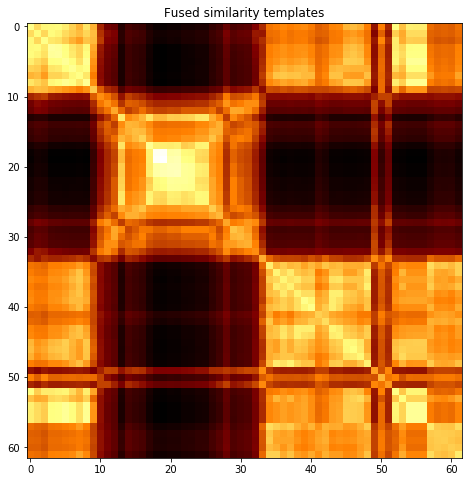

subject 14; gesture 2_1_1


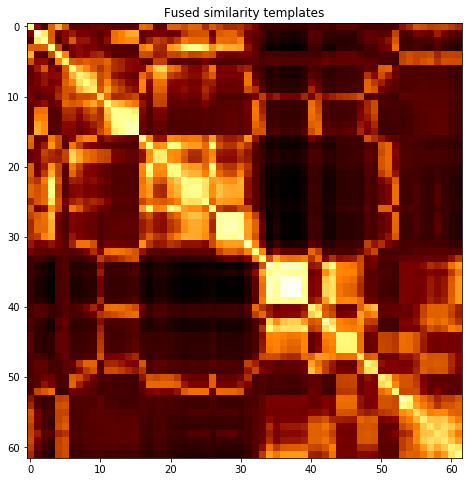

subject 23; gesture 2_0_1


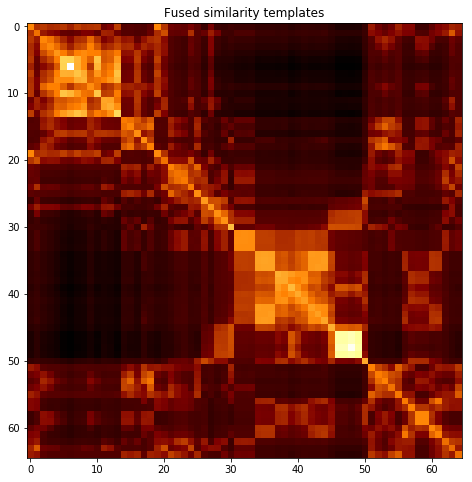

subject 23; gesture 2_0_2


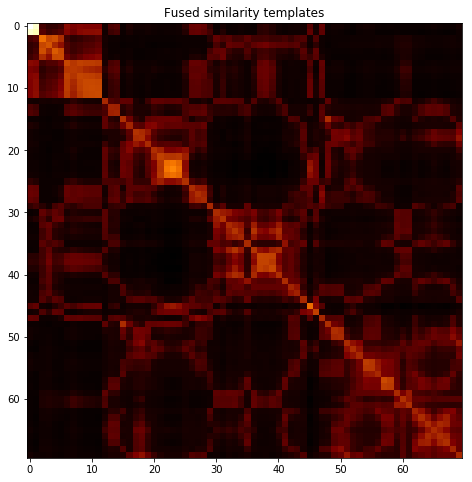

subject 23; gesture 2_1_2


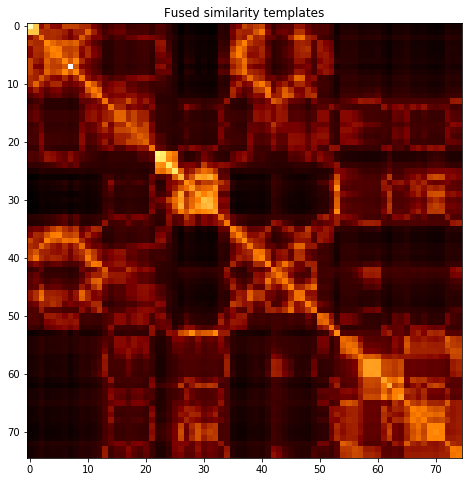

subject 23; gesture 2_1_1


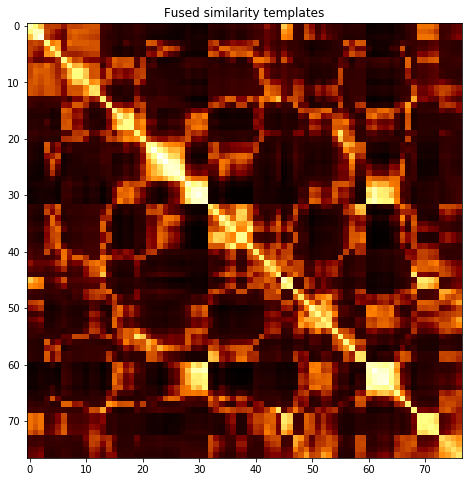

subject 25; gesture 2_0_1


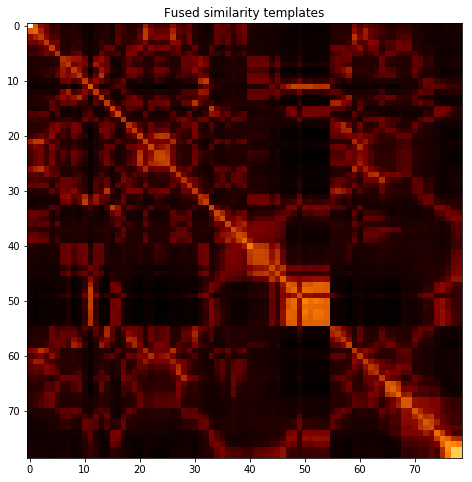

subject 25; gesture 2_0_2


subject 25; gesture 2_1_2


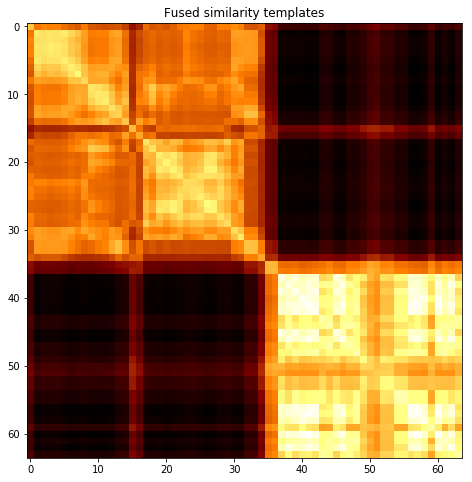

subject 25; gesture 2_1_1


subject 18; gesture 2_0_1


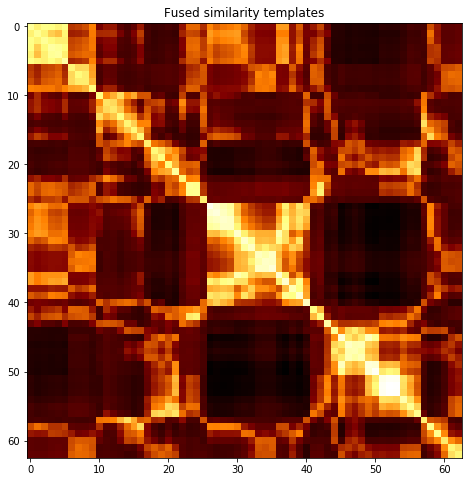

subject 18; gesture 2_0_2


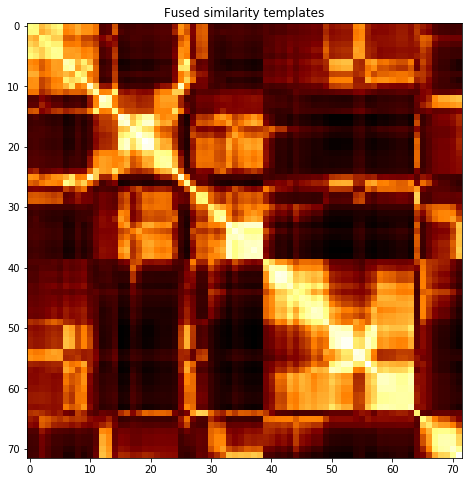

subject 18; gesture 2_1_2


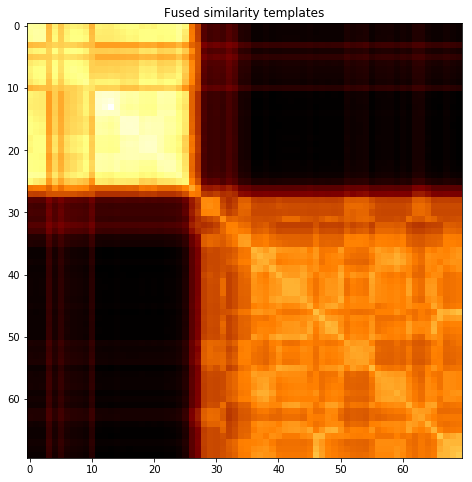

subject 18; gesture 2_1_1


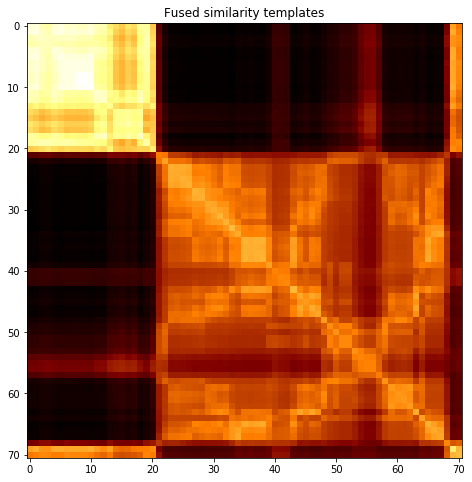

subject 29; gesture 2_0_1


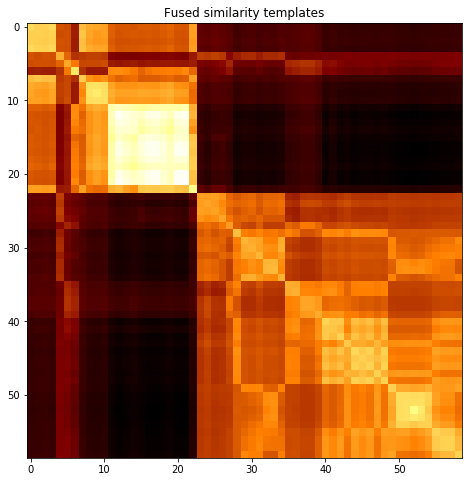

subject 29; gesture 2_0_2


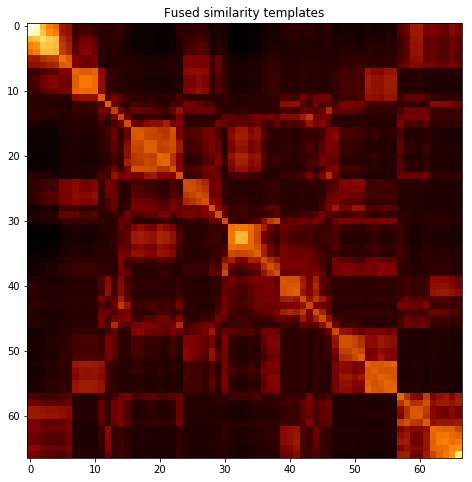

subject 29; gesture 2_1_2


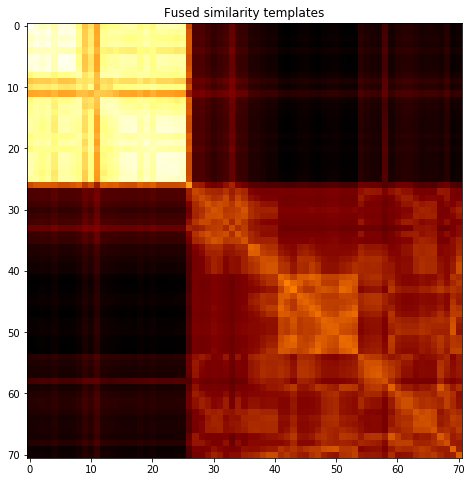

subject 29; gesture 2_1_1


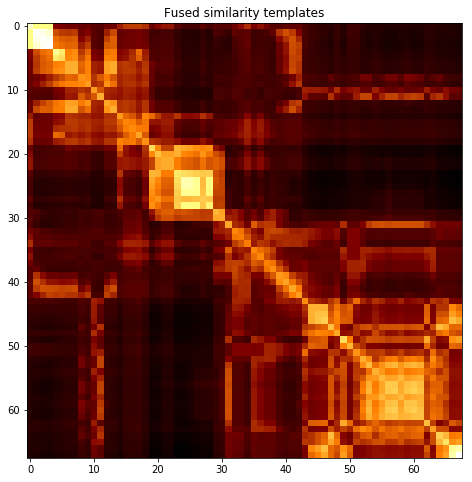

subject 15; gesture 2_0_1


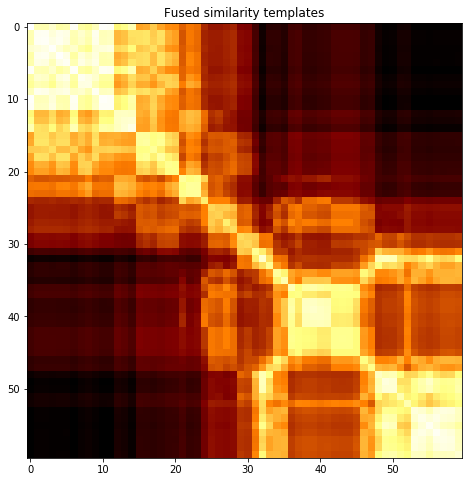

subject 15; gesture 2_0_2


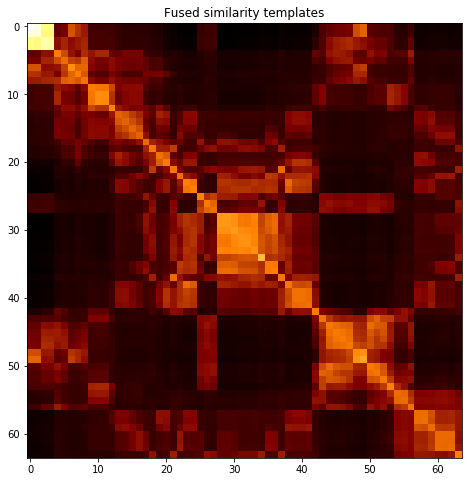

subject 15; gesture 2_1_2


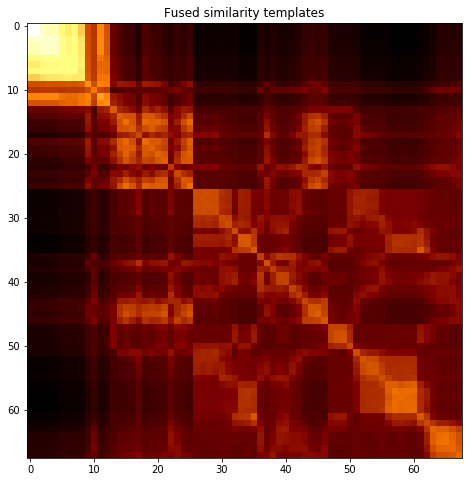

subject 15; gesture 2_1_1


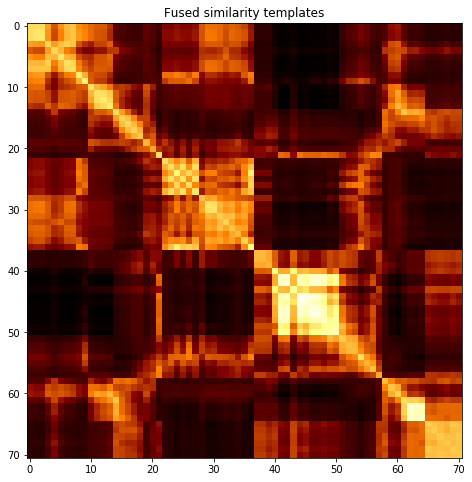

subject 28; gesture 2_0_1


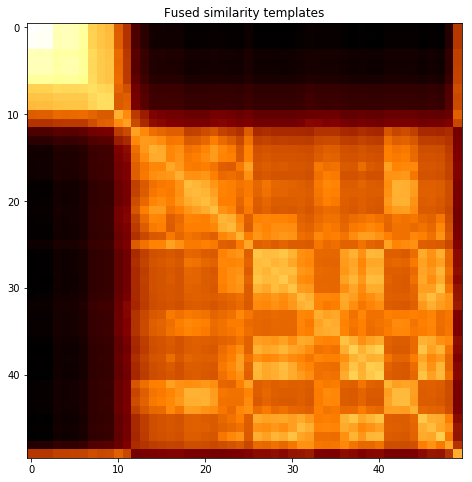

subject 28; gesture 2_0_2


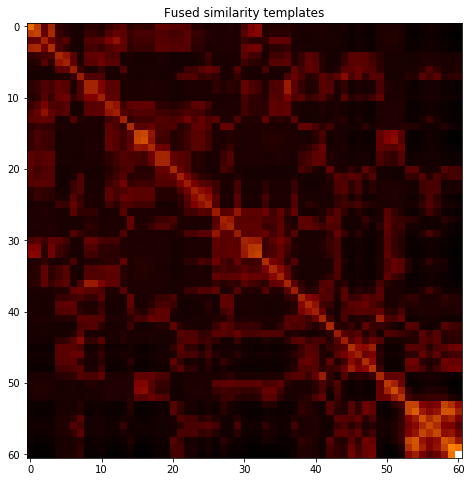

subject 28; gesture 2_1_2


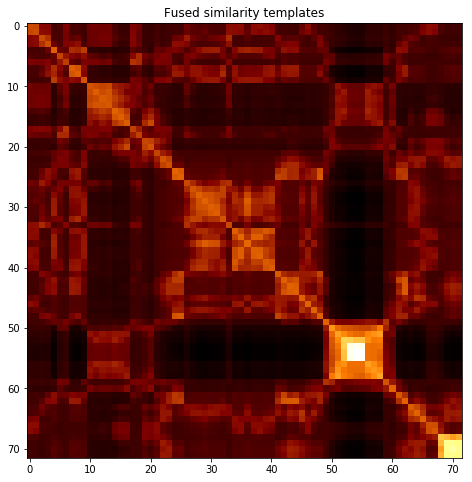

subject 28; gesture 2_1_1


subject 12; gesture 2_0_1


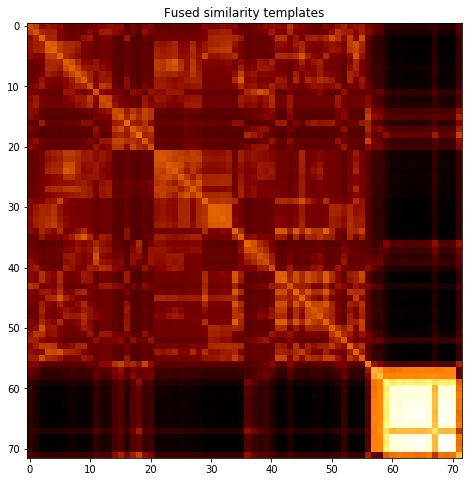

subject 12; gesture 2_0_2


subject 12; gesture 2_1_2


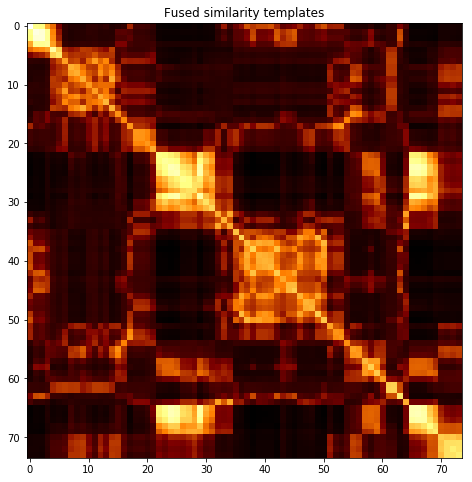

subject 12; gesture 2_1_1


subject 19; gesture 2_0_1


subject 19; gesture 2_0_2


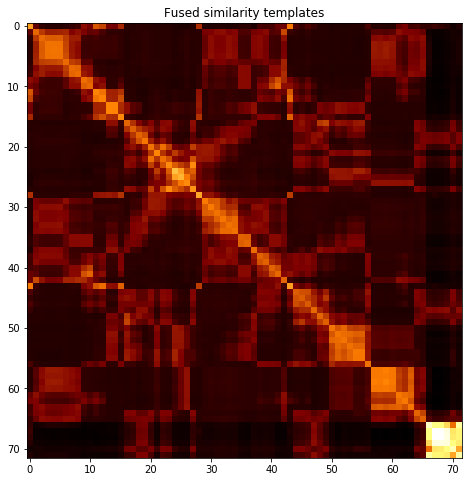

subject 19; gesture 2_1_2


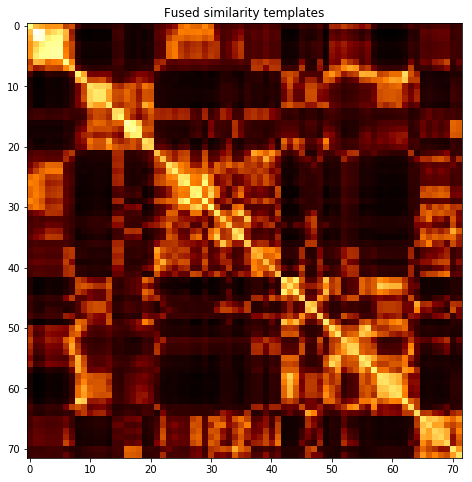

subject 19; gesture 2_1_1


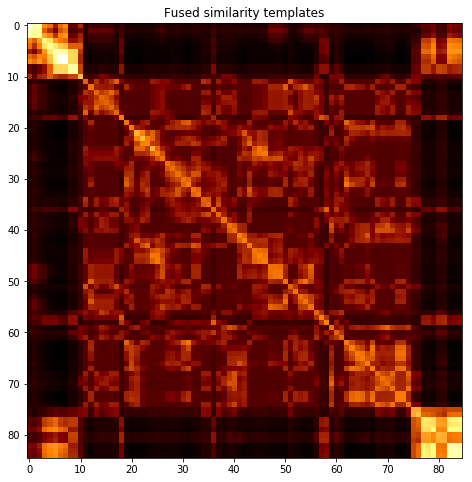

subject 07; gesture 2_0_1


subject 07; gesture 2_0_2


subject 07; gesture 2_1_2


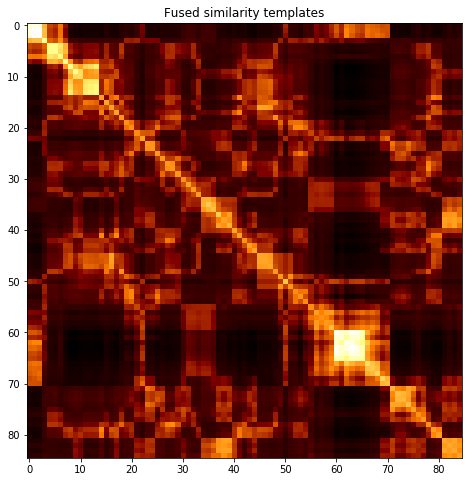

subject 07; gesture 2_1_1


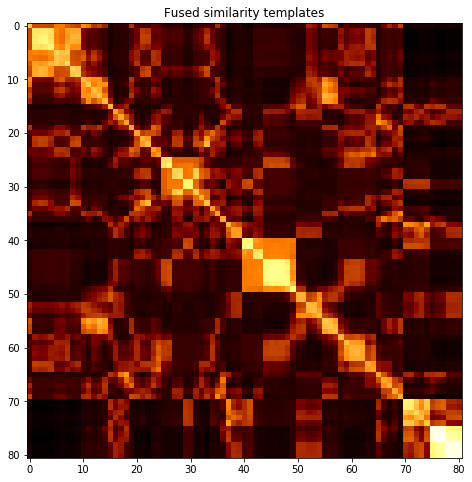

subject 20; gesture 2_0_1


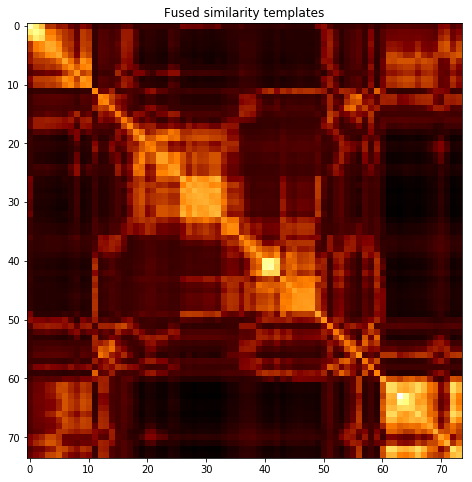

subject 20; gesture 2_0_2


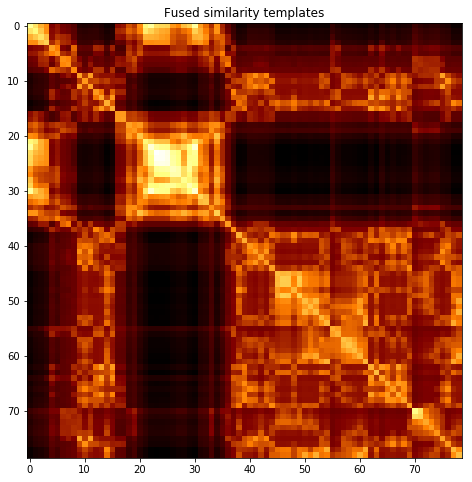

subject 20; gesture 2_1_2


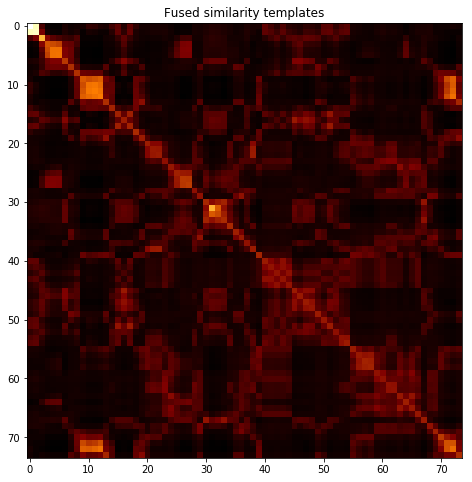

subject 20; gesture 2_1_1


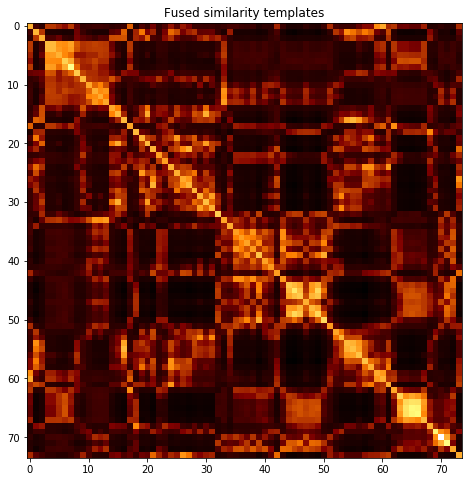

subject 31; gesture 2_0_1


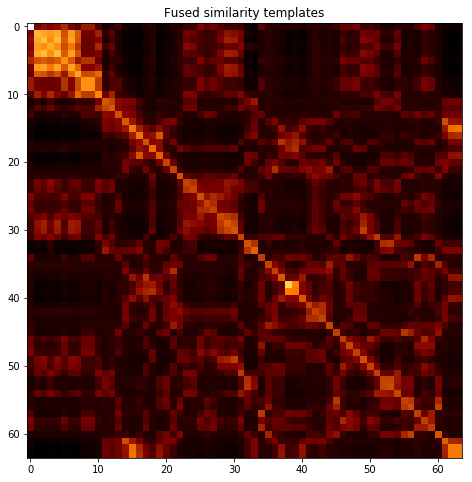

subject 31; gesture 2_0_2


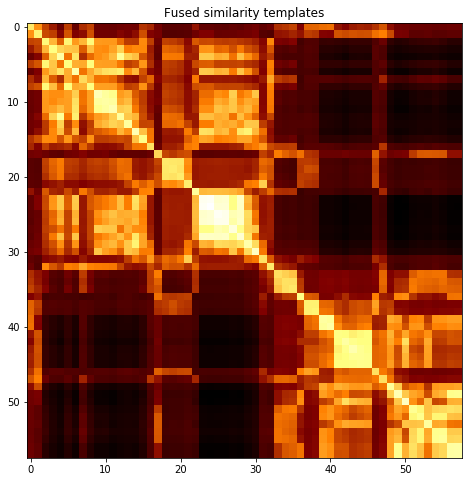

subject 31; gesture 2_1_2


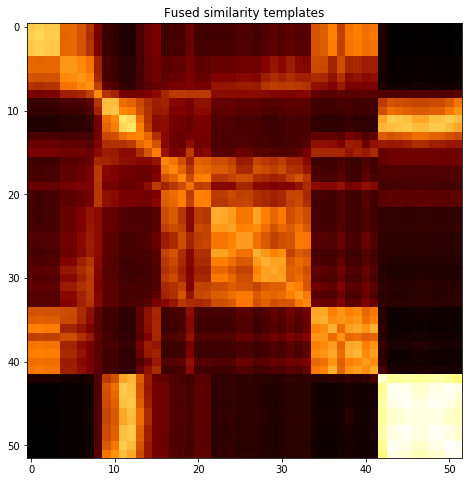

subject 31; gesture 2_1_1


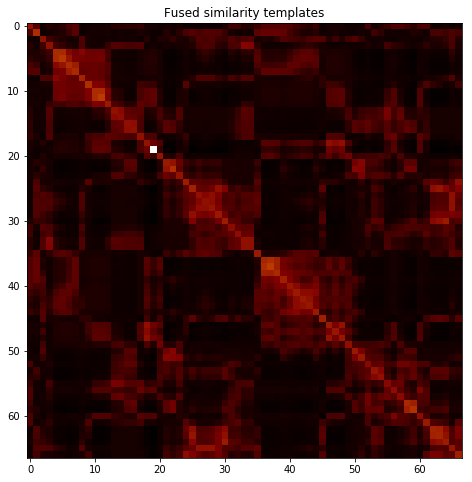

subject 13; gesture 2_0_1


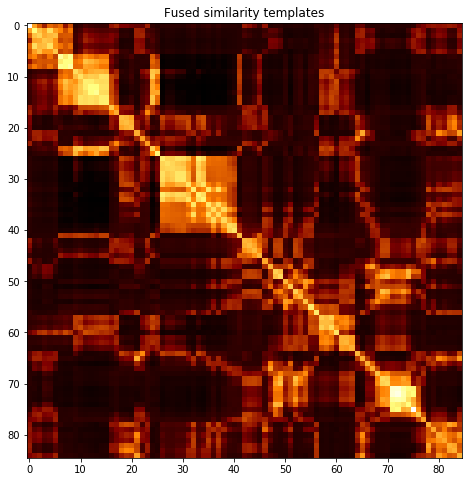

subject 13; gesture 2_0_2


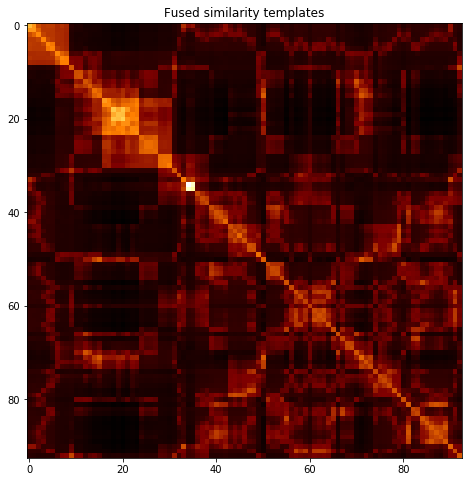

subject 13; gesture 2_1_2


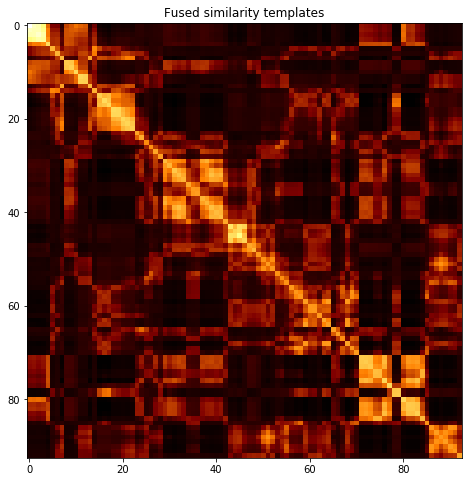

subject 13; gesture 2_1_1


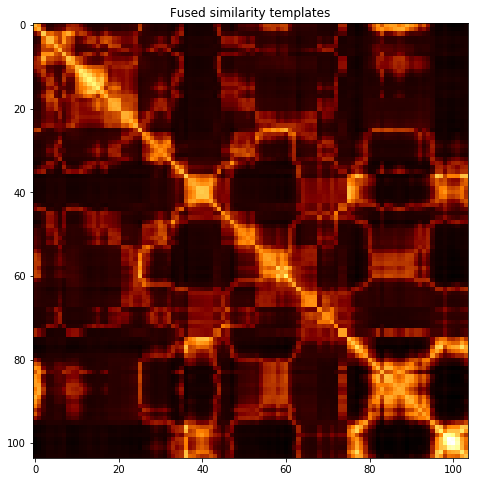

subject 36; gesture 2_0_1


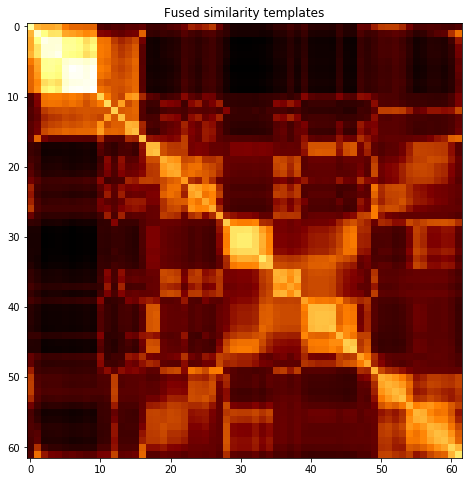

subject 36; gesture 2_0_2


subject 36; gesture 2_1_2


subject 36; gesture 2_1_1


subject 24; gesture 2_0_1


subject 24; gesture 2_0_2


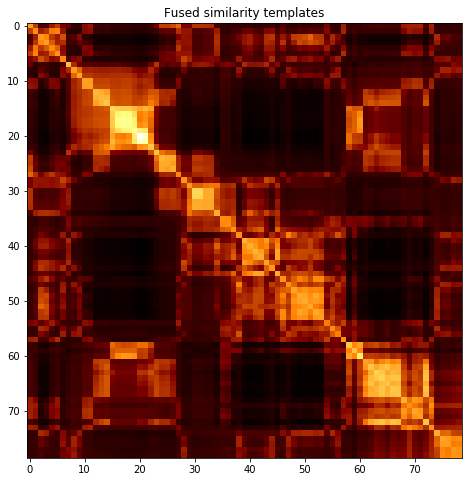

subject 24; gesture 2_1_2


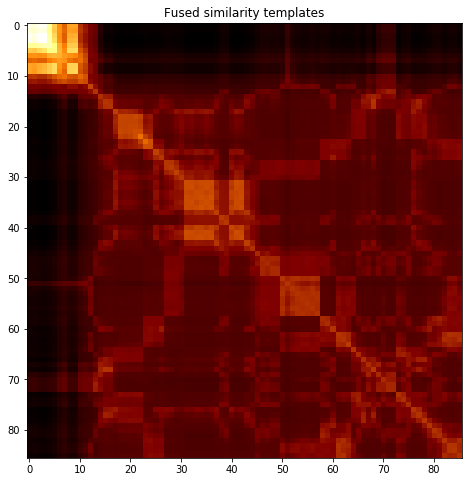

subject 24; gesture 2_1_1


subject 33; gesture 2_0_1


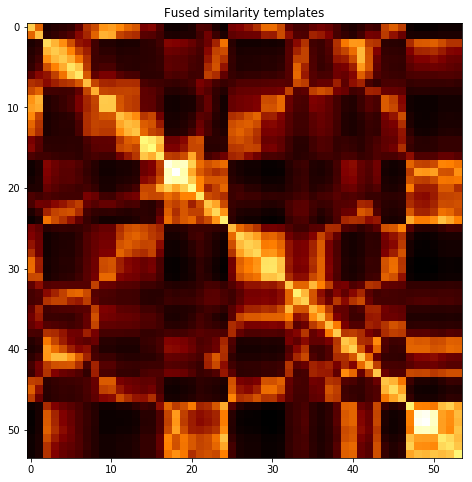

subject 33; gesture 2_0_2


subject 33; gesture 2_1_2


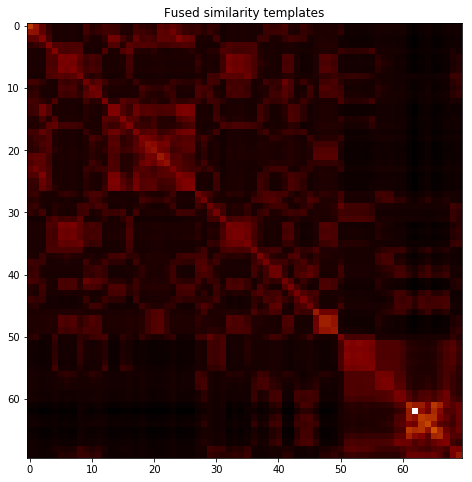

subject 33; gesture 2_1_1


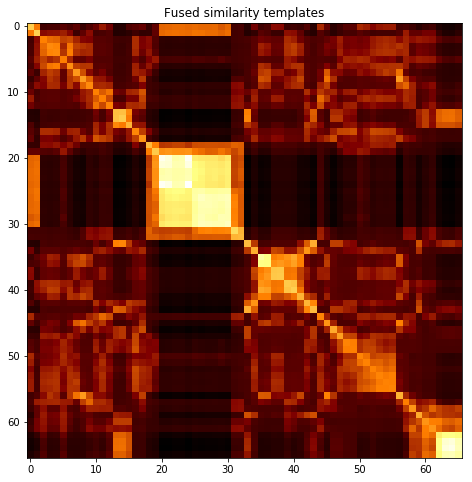

subject 11; gesture 2_0_1


subject 11; gesture 2_0_2


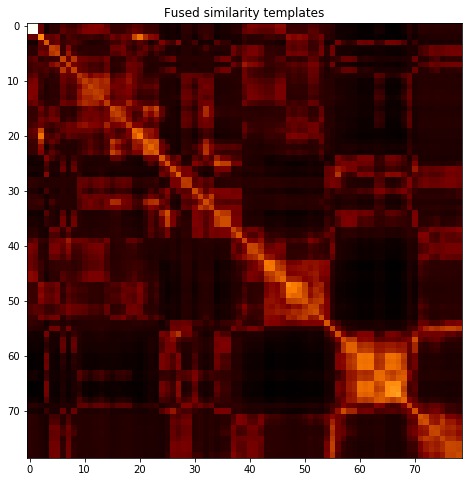

subject 11; gesture 2_1_2


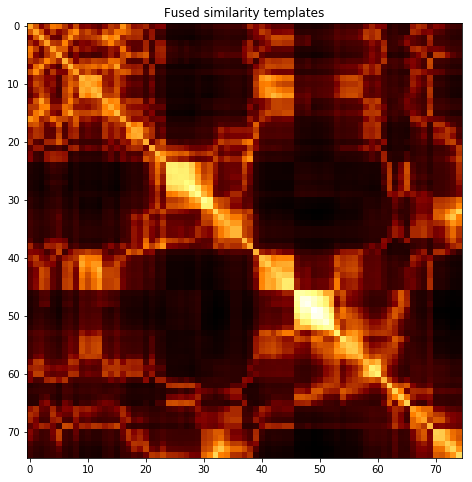

subject 11; gesture 2_1_1


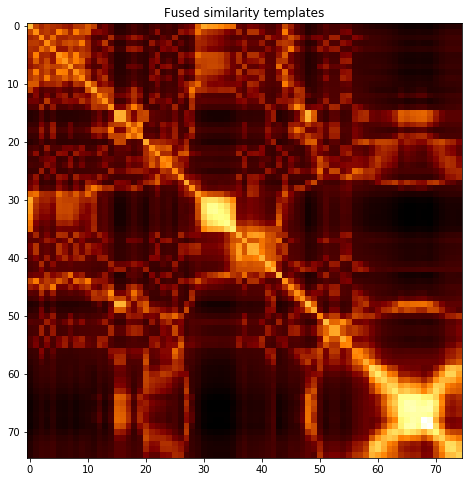

subject 35; gesture 2_0_1


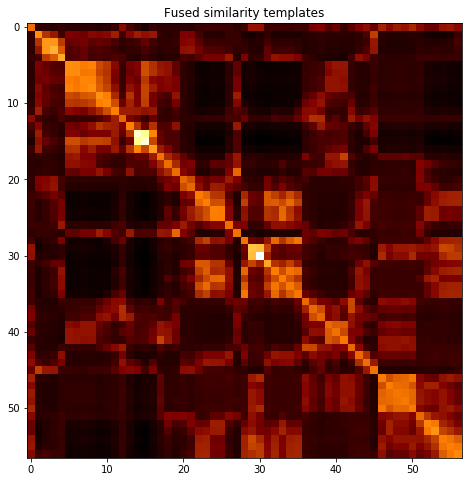

subject 35; gesture 2_0_2


subject 35; gesture 2_1_2


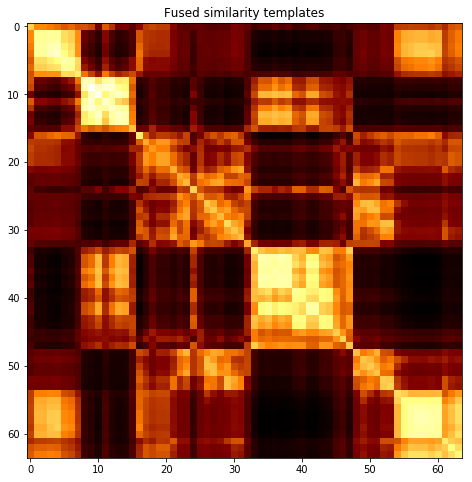

subject 35; gesture 2_1_1


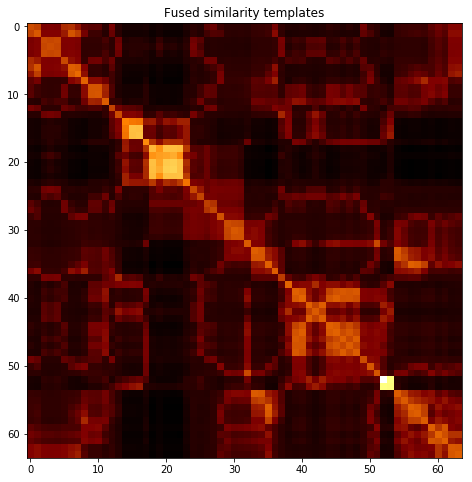

subject 22; gesture 2_0_1


subject 22; gesture 2_0_2


subject 22; gesture 2_1_2


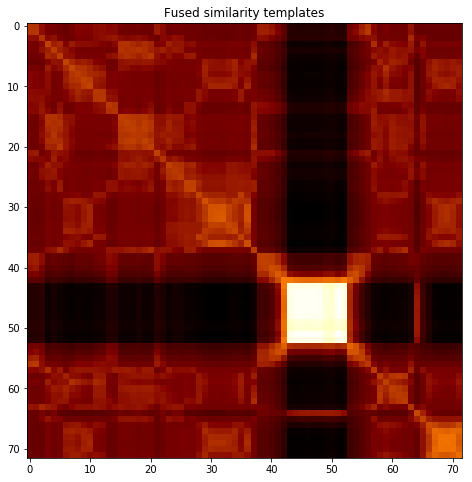

subject 22; gesture 2_1_1


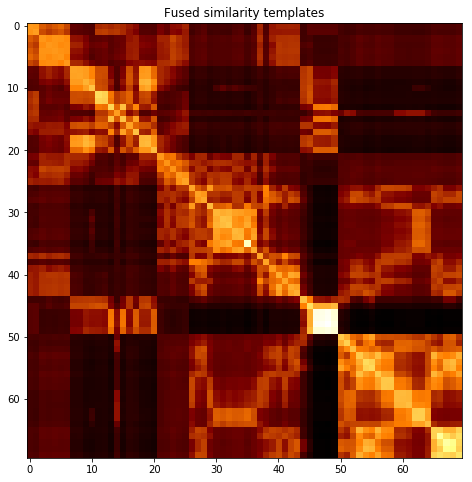

subject 34; gesture 2_0_1


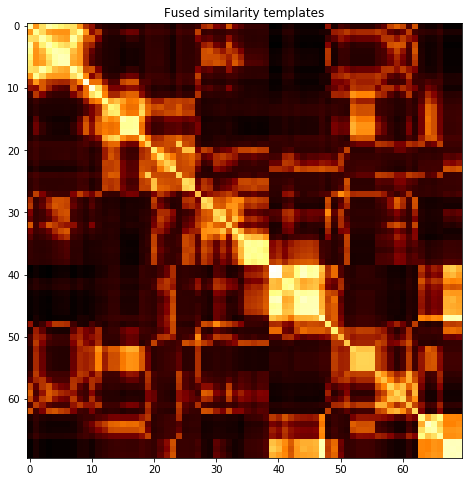

subject 34; gesture 2_0_2


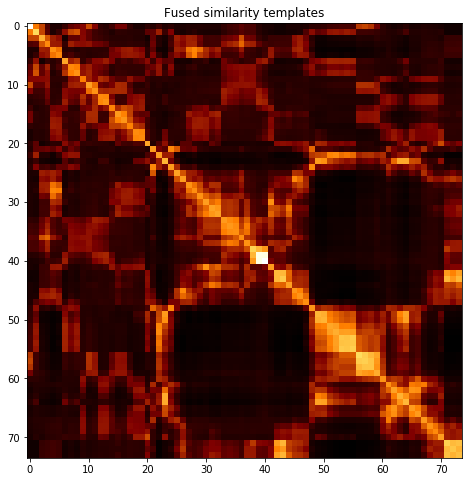

subject 34; gesture 2_1_2


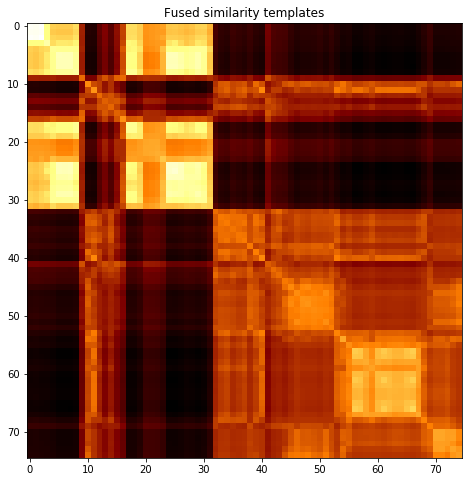

subject 34; gesture 2_1_1


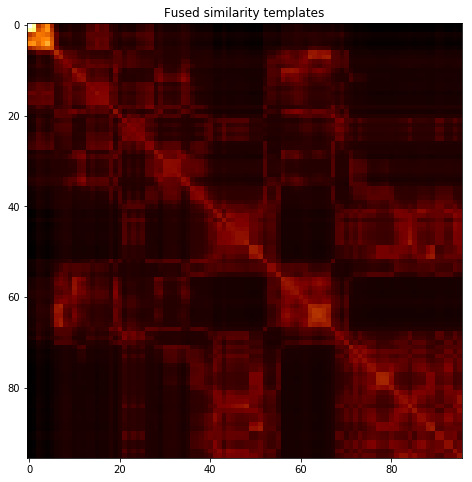

subject 10; gesture 2_0_1


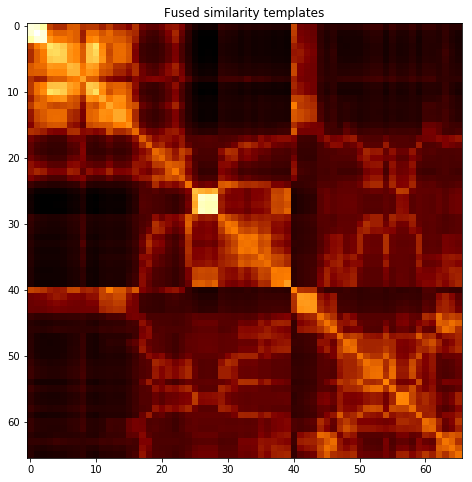

subject 10; gesture 2_0_2


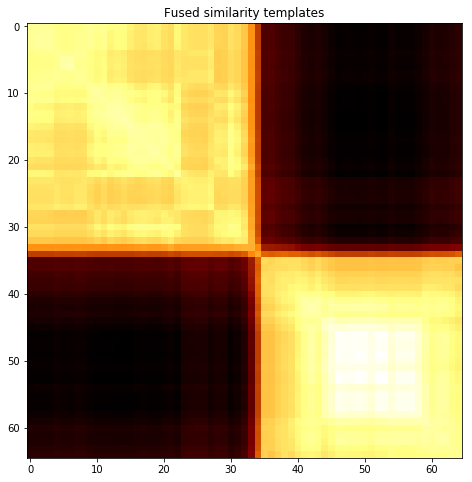

subject 10; gesture 2_1_2


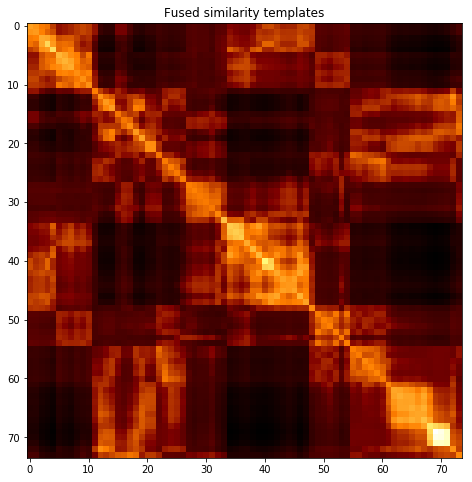

subject 10; gesture 2_1_1


subject 02; gesture 2_0_1


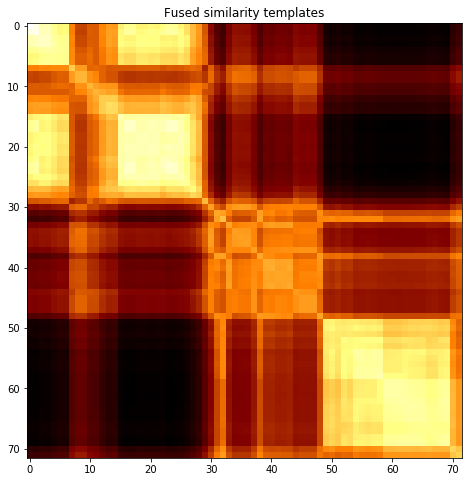

subject 02; gesture 2_0_2


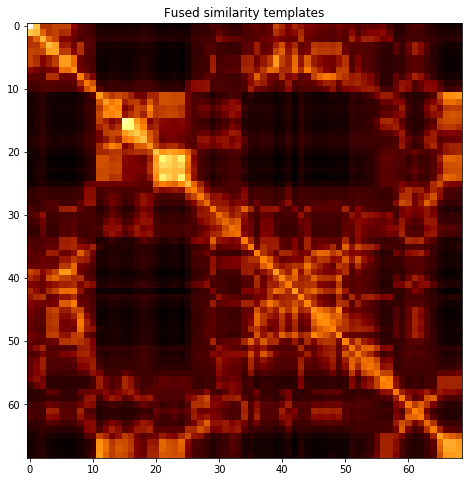

subject 02; gesture 2_1_2


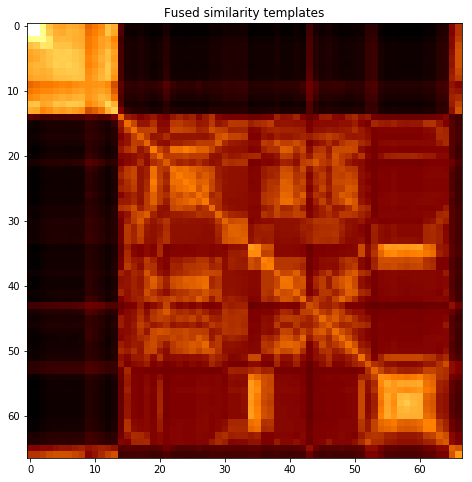

subject 02; gesture 2_1_1


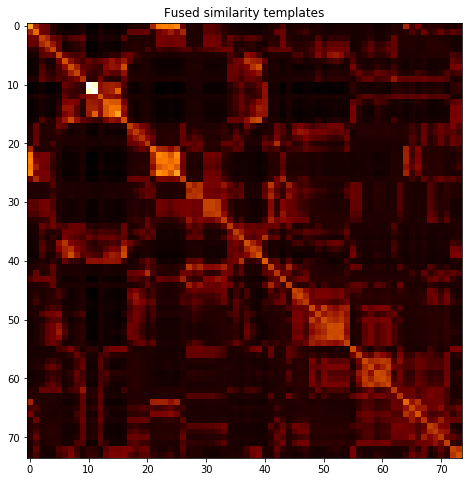

In [4]:
g2_dict_synerg = {}
for s, gdict in dc.data_set_smooth.items():
    g2_dict_synerg[s] = {}
    for g, a in gdict.items():
        snf = SNF(dc.data_set_smooth[s][g][:, :-1], k=0.2)
        # calculate graph weights to find knn
        snf.calc_weights()
        snf.normalize_weights()
        # generate and normalize knn graphs
        snf.calc_knn_weights()
        snf.normalize_knn_weights()
        # fuse graphs
        snf.network_fusion(iters=20)
        print(f"subject {s}; gesture {g}")
        snf.plot_template()
        # save template to dict
        g2_dict_synerg[s][g] = snf.fused_similarity_template

---

Goal: find differences between "static-y" fused SSMs and "smooth" fused SSMs


Observations:
 - SSMs with a lot of static have very low st. dev.; All elements very similar.
 - SSMs with higher st. dev. have more obvious/ bold features.
 - some exceptions exist (e.g. subject 02 gesture 1_1_1 - still a lot of static but a bold feature exists)

---
Can I do PCA for all of these and get similar results?

subject 30; gesture 2_0_1; avg 0.5273277678971049; sd 0.04212368255211654
subject 30; gesture 2_0_1; PoV: 0.8443968740141621


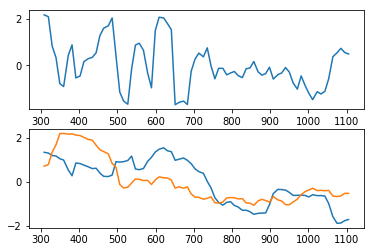

subject 30; gesture 2_0_2; avg 0.5740825537206922; sd 0.025325140055843777
subject 30; gesture 2_0_2; PoV: 0.8717727077225684


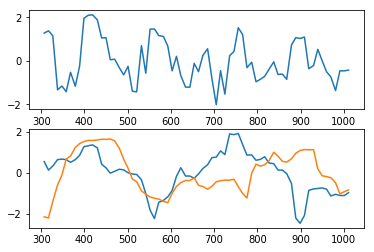

subject 30; gesture 2_1_2; avg 0.5974759404226583; sd 0.07738030945567571
subject 30; gesture 2_1_2; PoV: 0.8129452075604637


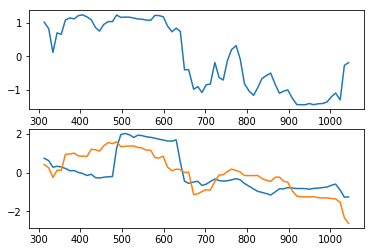

subject 30; gesture 2_1_1; avg 0.4697463048665221; sd 0.024195205917328405
subject 30; gesture 2_1_1; PoV: 0.8689546670588576


subject 06; gesture 2_0_1; avg 0.6949775807056325; sd 0.06943515942810805
subject 06; gesture 2_0_1; PoV: 0.8291338705612454


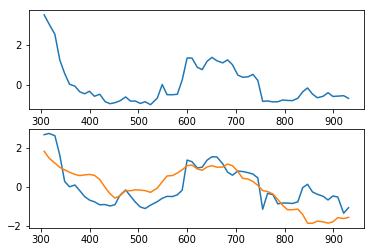

subject 06; gesture 2_0_2; avg 0.7507432978686148; sd 0.03347390090682446
subject 06; gesture 2_0_2; PoV: 0.8802174373478111


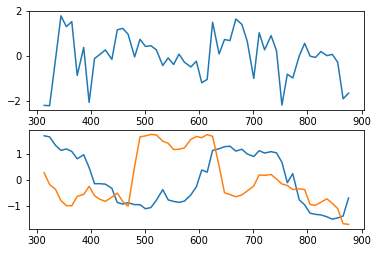

subject 06; gesture 2_1_2; avg 0.677408667652066; sd 0.09262518234004957
subject 06; gesture 2_1_2; PoV: 0.799002816863329


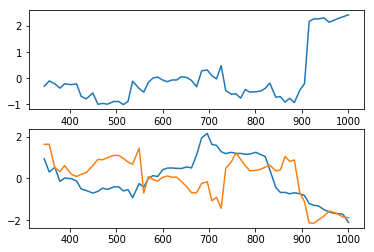

subject 06; gesture 2_1_1; avg 0.5421669105671393; sd 0.03671985506535924
subject 06; gesture 2_1_1; PoV: 0.8505878272728451


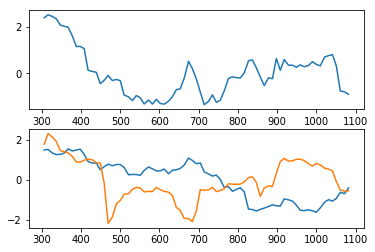

subject 09; gesture 2_0_1; avg 0.7233478602595299; sd 0.04300089947046266
subject 09; gesture 2_0_1; PoV: 0.8566386279999512


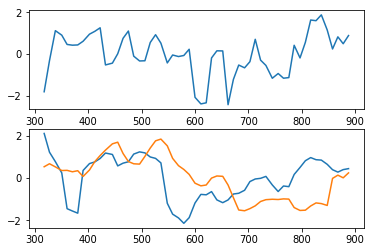

subject 09; gesture 2_0_2; avg 0.6384278364401332; sd 0.0810948190195668
subject 09; gesture 2_0_2; PoV: 0.8094342749092529


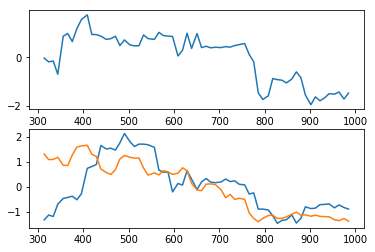

subject 09; gesture 2_1_2; avg 0.6531850622474245; sd 0.06025257255109644
subject 09; gesture 2_1_2; PoV: 0.8366832710433443


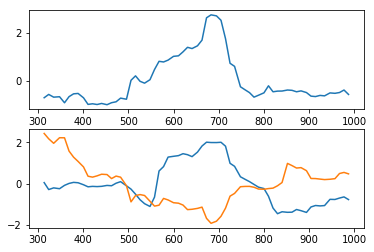

subject 09; gesture 2_1_1; avg 0.7198866700877473; sd 0.09405300927130913
subject 09; gesture 2_1_1; PoV: 0.794782170412051


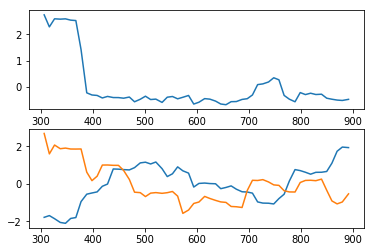

subject 03; gesture 2_0_1; avg 0.593934009969475; sd 0.03442321059033044
subject 03; gesture 2_0_1; PoV: 0.8587062530352348


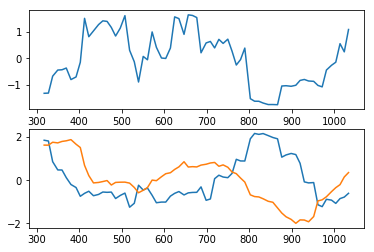

subject 03; gesture 2_0_2; avg 0.6295398643570439; sd 0.03379596815013155
subject 03; gesture 2_0_2; PoV: 0.865994473020119


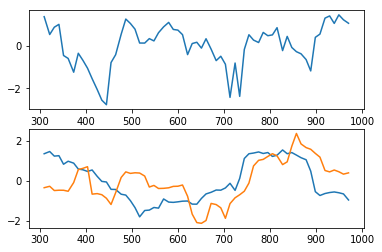

subject 03; gesture 2_1_2; avg 0.6047048154689084; sd 0.03406141747877333
subject 03; gesture 2_1_2; PoV: 0.8620171544657993


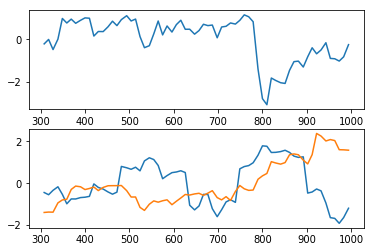

subject 03; gesture 2_1_1; avg 0.7286318372641016; sd 0.03417698237311632
subject 03; gesture 2_1_1; PoV: 0.8710526757505309


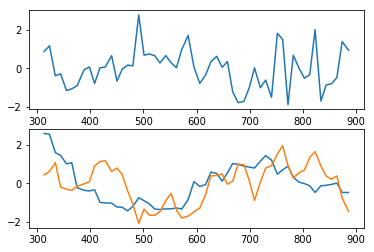

subject 05; gesture 2_0_1; avg 0.593702128395471; sd 0.04344216940205323
subject 05; gesture 2_0_1; PoV: 0.8512111407846086


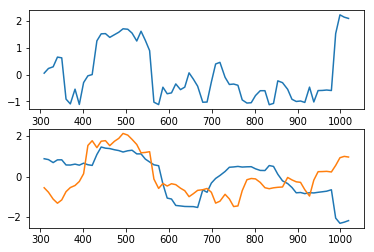

subject 05; gesture 2_0_2; avg 0.5594353472294576; sd 0.05039297395882561
subject 05; gesture 2_0_2; PoV: 0.8249162631751171


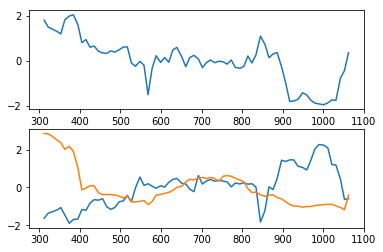

subject 05; gesture 2_1_2; avg 0.5023109483900086; sd 0.027235929075941325
subject 05; gesture 2_1_2; PoV: 0.8603447804675758


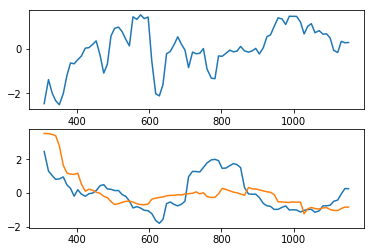

subject 05; gesture 2_1_1; avg 0.7898091946381711; sd 0.06621801676639792
subject 05; gesture 2_1_1; PoV: 0.8351643153631209


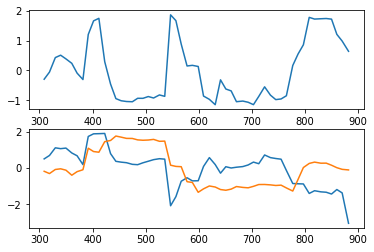

subject 21; gesture 2_0_1; avg 0.5527513849204273; sd 0.04035442413344194
subject 21; gesture 2_0_1; PoV: 0.8492647780154171


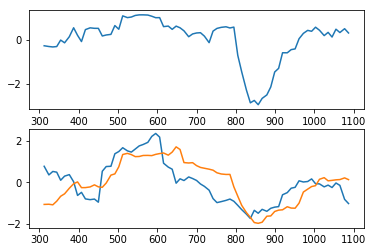

subject 21; gesture 2_0_2; avg 0.6911061141809448; sd 0.055740853741137415
subject 21; gesture 2_0_2; PoV: 0.8440945069257894


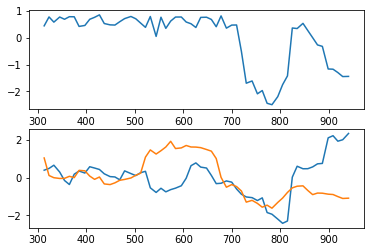

subject 21; gesture 2_1_2; avg 0.6159509687350975; sd 0.02820578913960924
subject 21; gesture 2_1_2; PoV: 0.8702334210557366


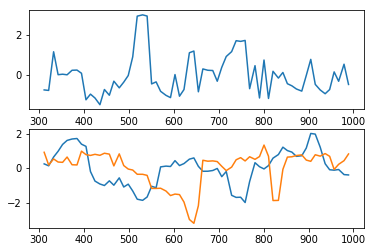

subject 21; gesture 2_1_1; avg 0.5081074811735115; sd 0.0297528093161147
subject 21; gesture 2_1_1; PoV: 0.8551700115789617


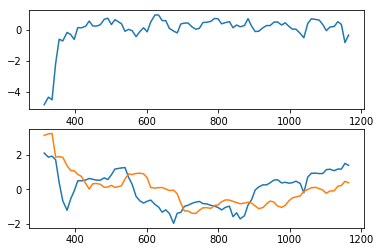

subject 17; gesture 2_0_1; avg 0.6167477596819725; sd 0.09542155151811423
subject 17; gesture 2_0_1; PoV: 0.7919383741922695


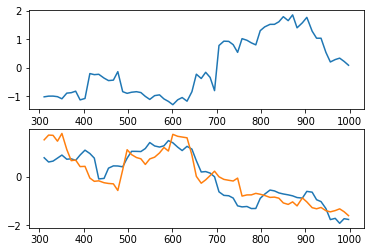

subject 17; gesture 2_0_2; avg 0.6146507210708829; sd 0.03148102736131154
subject 17; gesture 2_0_2; PoV: 0.8674127368523259


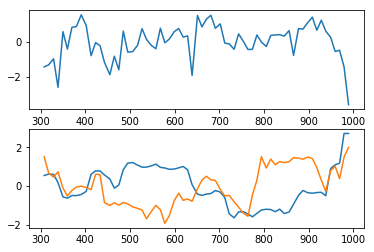

subject 17; gesture 2_1_2; avg 0.5682294635796185; sd 0.038000767430149136
subject 17; gesture 2_1_2; PoV: 0.8567255376249702


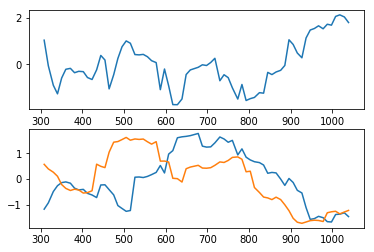

subject 17; gesture 2_1_1; avg 0.5623042022372524; sd 0.0642283444719366
subject 17; gesture 2_1_1; PoV: 0.8064899486568654


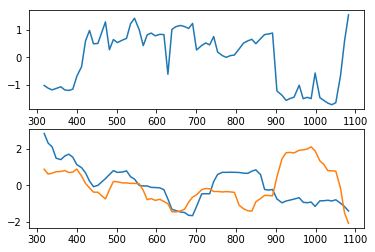

subject 01; gesture 2_0_1; avg 0.5703916045003716; sd 0.023277099502791294
subject 01; gesture 2_0_1; PoV: 0.8873956655205857


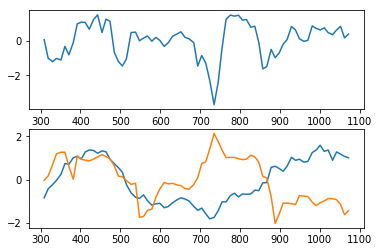

subject 01; gesture 2_0_2; avg 0.6400017276459058; sd 0.06156417674513234
subject 01; gesture 2_0_2; PoV: 0.8277238487961791


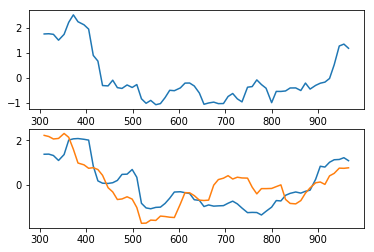

subject 01; gesture 2_1_2; avg 0.5777943681617786; sd 0.03147258667356081
subject 01; gesture 2_1_2; PoV: 0.8652245087661931


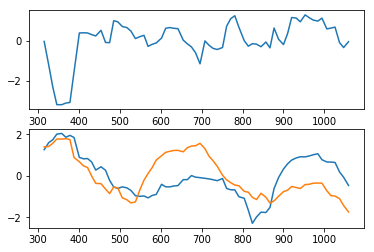

subject 01; gesture 2_1_1; avg 0.5723171633831108; sd 0.056318541368192705
subject 01; gesture 2_1_1; PoV: 0.8206368032120835


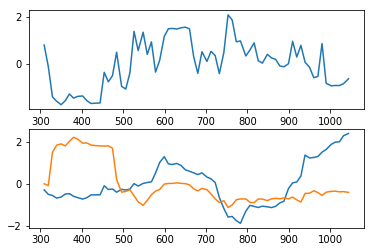

subject 16; gesture 2_0_1; avg 0.6648819758515081; sd 0.15057700154198414
subject 16; gesture 2_0_1; PoV: 0.7415410523986309


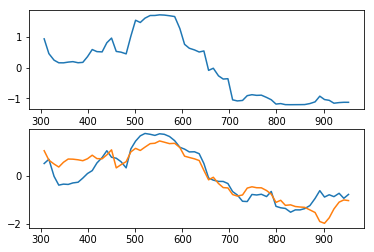

subject 16; gesture 2_0_2; avg 0.6363425015675991; sd 0.034765414876733375
subject 16; gesture 2_0_2; PoV: 0.8700198067326198


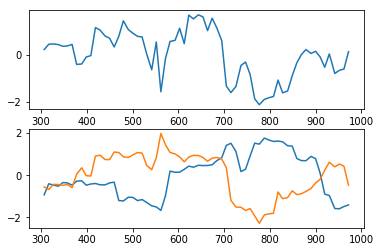

subject 16; gesture 2_1_2; avg 0.5429441324646942; sd 0.03596789882721502
subject 16; gesture 2_1_2; PoV: 0.8568608059559186


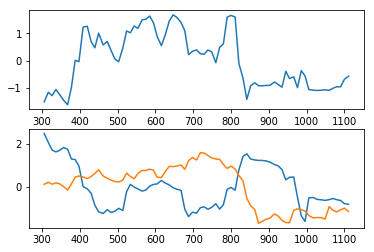

subject 16; gesture 2_1_1; avg 0.5780820974550002; sd 0.04201727919442894
subject 16; gesture 2_1_1; PoV: 0.8559309645725361


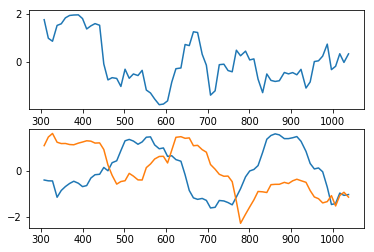

subject 26; gesture 2_0_1; avg 0.7537465585263624; sd 0.03756496494645899
subject 26; gesture 2_0_1; PoV: 0.8704814244680167


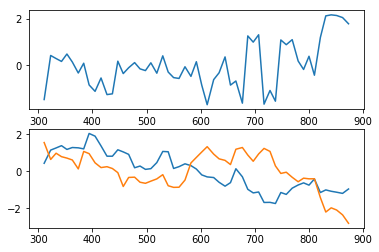

subject 26; gesture 2_0_2; avg 0.6683296498591639; sd 0.0438958027709126
subject 26; gesture 2_0_2; PoV: 0.855451690290198


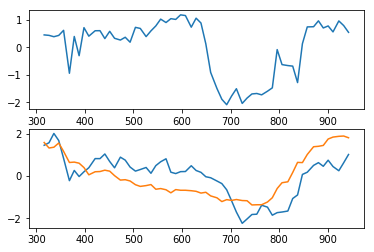

subject 26; gesture 2_1_2; avg 0.6046761318970129; sd 0.03509240852272648
subject 26; gesture 2_1_2; PoV: 0.8650865012016858


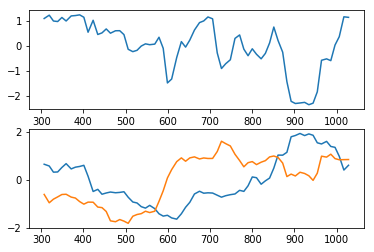

subject 26; gesture 2_1_1; avg 0.6893434033823973; sd 0.040145635272888607
subject 26; gesture 2_1_1; PoV: 0.856943671217035


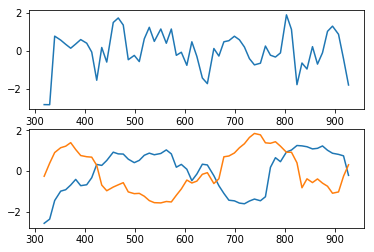

subject 32; gesture 2_0_1; avg 0.47897198365521476; sd 0.09950937998527512
subject 32; gesture 2_0_1; PoV: 0.7553506093931129


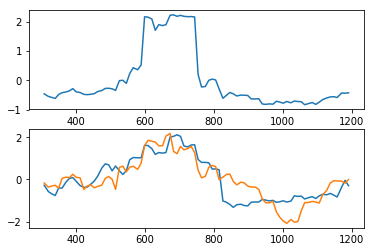

subject 32; gesture 2_0_2; avg 0.4717159412540053; sd 0.03421382252457978
subject 32; gesture 2_0_2; PoV: 0.8511571683601808


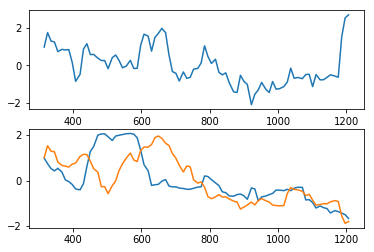

subject 32; gesture 2_1_2; avg 0.4863812719291622; sd 0.026527561322705374
subject 32; gesture 2_1_2; PoV: 0.8637247697384934


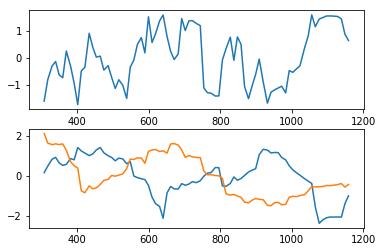

subject 32; gesture 2_1_1; avg 0.44953826742060005; sd 0.02464473141955311
subject 32; gesture 2_1_1; PoV: 0.8704492698957933


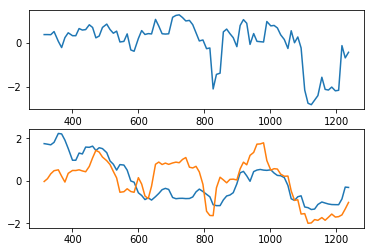

subject 04; gesture 2_0_1; avg 0.6364981449599486; sd 0.03649676184260391
subject 04; gesture 2_0_1; PoV: 0.8671428878671047


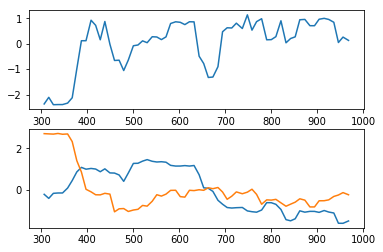

subject 04; gesture 2_0_2; avg 0.6508174491762903; sd 0.040034413861693256
subject 04; gesture 2_0_2; PoV: 0.8548969282637854


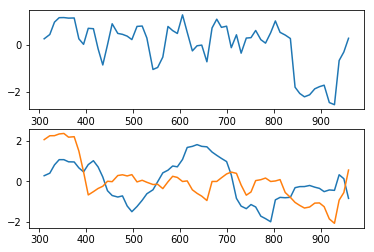

subject 04; gesture 2_1_2; avg 0.6032884977337392; sd 0.027657721127965634
subject 04; gesture 2_1_2; PoV: 0.8743628405638404


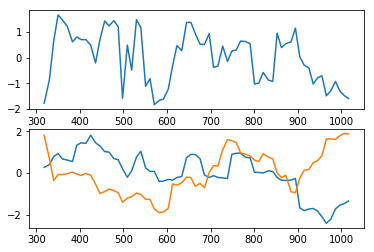

subject 04; gesture 2_1_1; avg 0.5897738855820778; sd 0.055498373574825385
subject 04; gesture 2_1_1; PoV: 0.8480036665703312


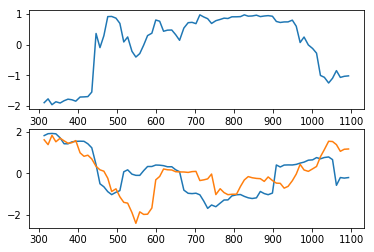

subject 08; gesture 2_0_1; avg 0.7079751113434127; sd 0.041470672608206055
subject 08; gesture 2_0_1; PoV: 0.8599414095194227


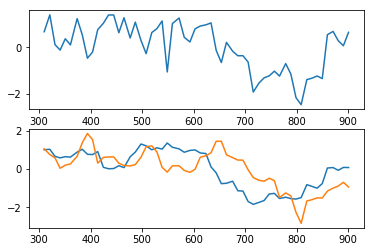

subject 08; gesture 2_0_2; avg 0.6703945169143052; sd 0.03209228492993616
subject 08; gesture 2_0_2; PoV: 0.866933017995285


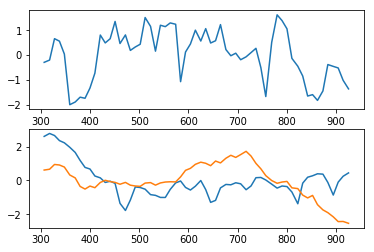

subject 08; gesture 2_1_2; avg 0.6151387537932809; sd 0.17059511572186195
subject 08; gesture 2_1_2; PoV: 0.7130904482294039


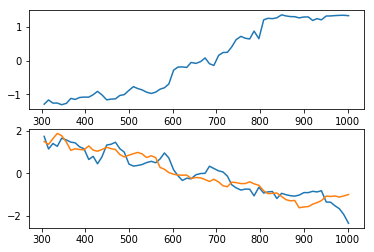

subject 08; gesture 2_1_1; avg 0.5174901312678436; sd 0.24188529401961412
subject 08; gesture 2_1_1; PoV: 0.6316468767330888


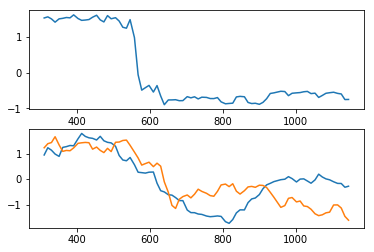

subject 27; gesture 2_0_1; avg 0.6264683354000472; sd 0.03910464187938614
subject 27; gesture 2_0_1; PoV: 0.8529401235895376


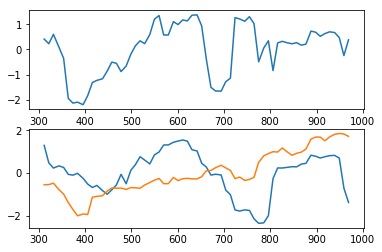

subject 27; gesture 2_0_2; avg 0.6358081424030078; sd 0.148788548872134
subject 27; gesture 2_0_2; PoV: 0.7608526639520593


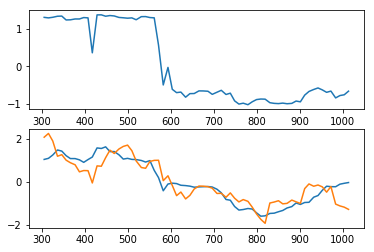

subject 27; gesture 2_1_2; avg 0.6282361181620657; sd 0.11280740178441062
subject 27; gesture 2_1_2; PoV: 0.7480603975499279


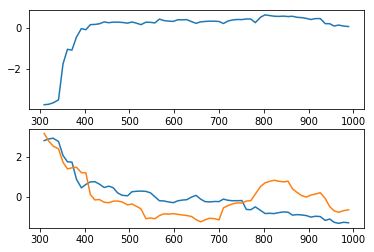

subject 27; gesture 2_1_1; avg 0.5521565245043655; sd 0.08947801257400975
subject 27; gesture 2_1_1; PoV: 0.7764411046304835


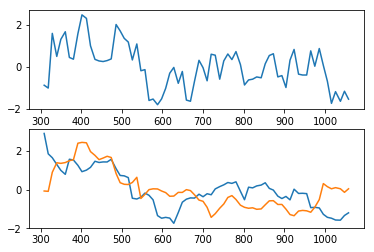

subject 14; gesture 2_0_1; avg 0.6474338835365299; sd 0.032400720557608634
subject 14; gesture 2_0_1; PoV: 0.8699929232352539


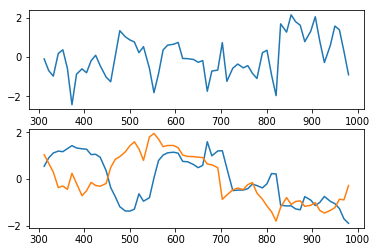

subject 14; gesture 2_0_2; avg 0.66461053532882; sd 0.04045203372401088
subject 14; gesture 2_0_2; PoV: 0.8569461755008825


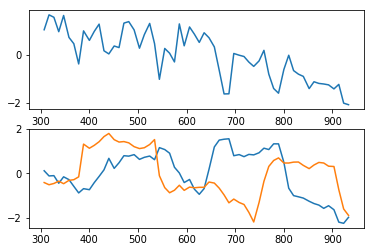

subject 14; gesture 2_1_2; avg 0.6997574397053358; sd 0.11197000905059089
subject 14; gesture 2_1_2; PoV: 0.79724022713343


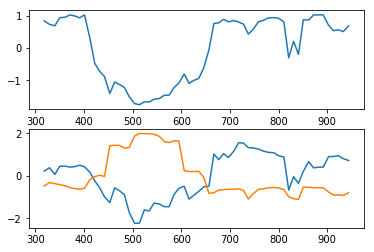

subject 14; gesture 2_1_1; avg 0.6555494485828762; sd 0.0361315703188924
subject 14; gesture 2_1_1; PoV: 0.8668245958667549


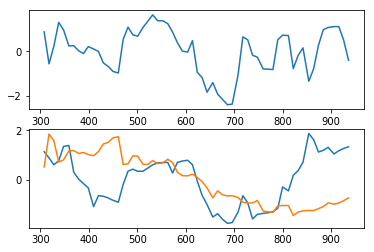

subject 23; gesture 2_0_1; avg 0.6312075679861692; sd 0.03470428620976091
subject 23; gesture 2_0_1; PoV: 0.866994066725886


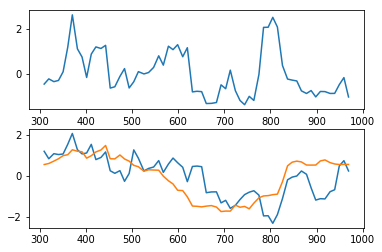

subject 23; gesture 2_0_2; avg 0.5760145881107684; sd 0.02653243674651571
subject 23; gesture 2_0_2; PoV: 0.8698780514721927


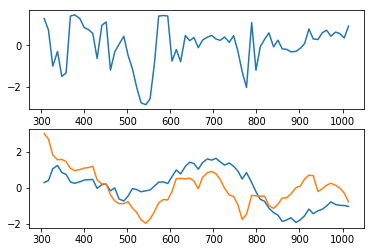

subject 23; gesture 2_1_2; avg 0.5461907513892547; sd 0.02782314716997055
subject 23; gesture 2_1_2; PoV: 0.8692864479182593


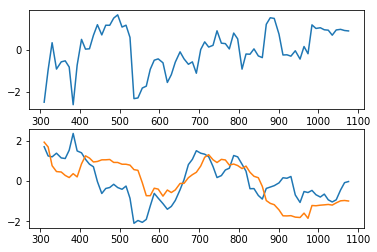

subject 23; gesture 2_1_1; avg 0.5239985418952623; sd 0.022986798324641337
subject 23; gesture 2_1_1; PoV: 0.8764179898279705


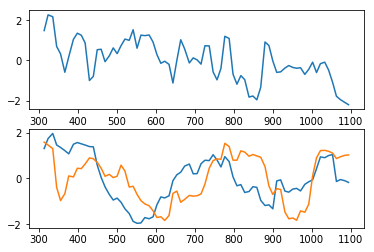

subject 25; gesture 2_0_1; avg 0.5095268500327086; sd 0.02464997184226373
subject 25; gesture 2_0_1; PoV: 0.8640153385631552


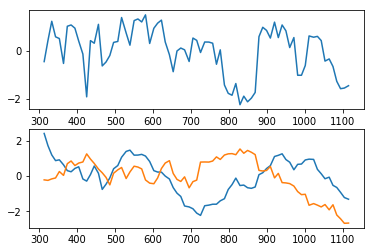

subject 25; gesture 2_0_2; avg 0.7073509425140015; sd 0.057207261255214796
subject 25; gesture 2_0_2; PoV: 0.8393336319048684


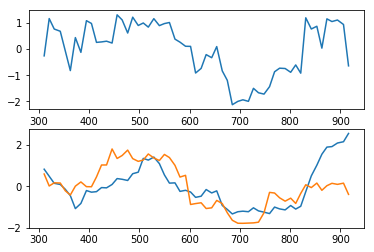

subject 25; gesture 2_1_2; avg 0.6439695468218698; sd 0.1340192541111589
subject 25; gesture 2_1_2; PoV: 0.7596135209937164


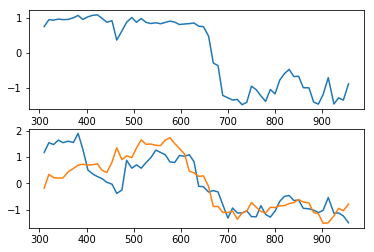

subject 25; gesture 2_1_1; avg 0.49289100594892055; sd 0.029062677971113175
subject 25; gesture 2_1_1; PoV: 0.8617701573353954


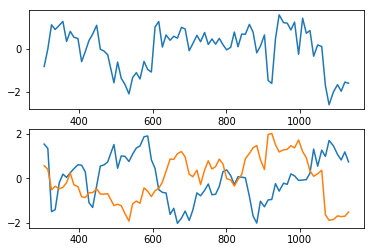

subject 18; gesture 2_0_1; avg 0.6636953741354081; sd 0.03571990376354942
subject 18; gesture 2_0_1; PoV: 0.8674533463904031


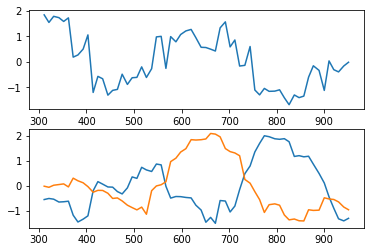

subject 18; gesture 2_0_2; avg 0.5835044816387774; sd 0.03547008745328589
subject 18; gesture 2_0_2; PoV: 0.8604229400120268


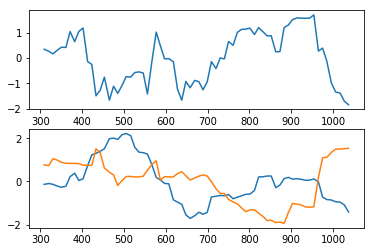

subject 18; gesture 2_1_2; avg 0.5810807131408318; sd 0.15806293698215568
subject 18; gesture 2_1_2; PoV: 0.727935178613439


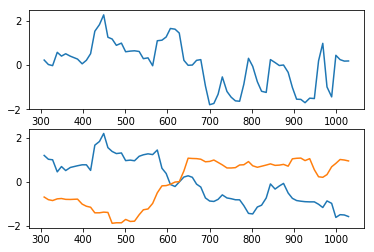

subject 18; gesture 2_1_1; avg 0.5832126878334737; sd 0.10359212430748765
subject 18; gesture 2_1_1; PoV: 0.7803004146795298


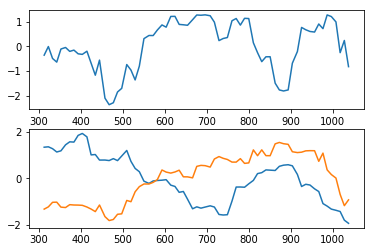

subject 29; gesture 2_0_1; avg 0.7187571216907989; sd 0.11403416604914593
subject 29; gesture 2_0_1; PoV: 0.784774638071761


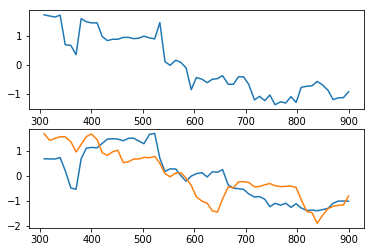

subject 29; gesture 2_0_2; avg 0.6086715893752968; sd 0.03246721310577386
subject 29; gesture 2_0_2; PoV: 0.8613408861306716


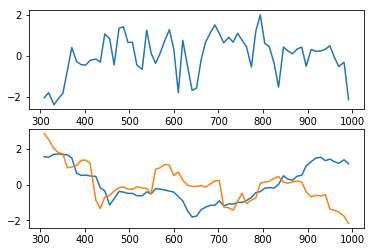

subject 29; gesture 2_1_2; avg 0.5975159860263481; sd 0.1311046553814519
subject 29; gesture 2_1_2; PoV: 0.7698534182389668


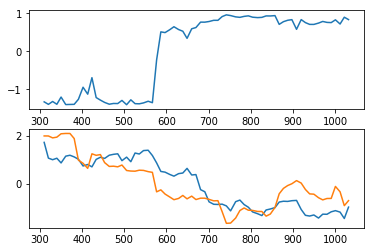

subject 29; gesture 2_1_1; avg 0.6112840610234895; sd 0.03914234805217258
subject 29; gesture 2_1_1; PoV: 0.8503099681768972


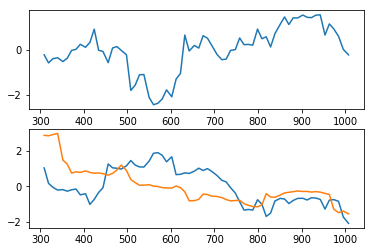

subject 15; gesture 2_0_1; avg 0.7085756461356001; sd 0.080365014468306
subject 15; gesture 2_0_1; PoV: 0.8212100267476946


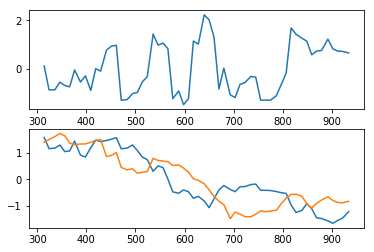

subject 15; gesture 2_0_2; avg 0.6540524089443596; sd 0.03588302774130811
subject 15; gesture 2_0_2; PoV: 0.8642324273984738


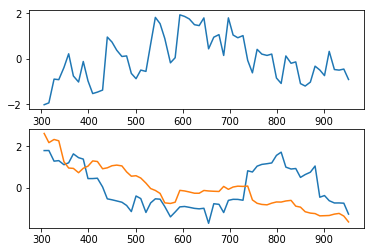

subject 15; gesture 2_1_2; avg 0.6119844441558328; sd 0.06600538316121105
subject 15; gesture 2_1_2; PoV: 0.8090837909653641


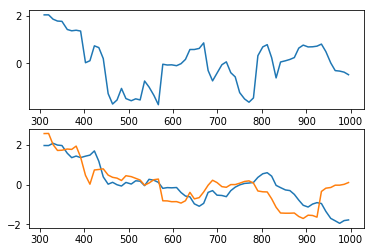

subject 15; gesture 2_1_1; avg 0.5733027289715883; sd 0.03724384269671749
subject 15; gesture 2_1_1; PoV: 0.8548965130942237


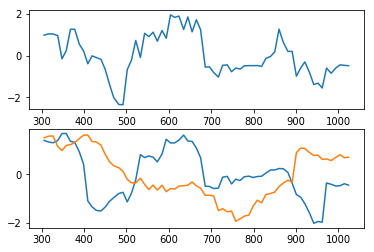

subject 28; gesture 2_0_1; avg 0.8878299389577289; sd 0.17536662153876023
subject 28; gesture 2_0_1; PoV: 0.7808483474319637


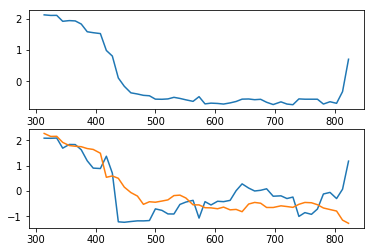

subject 28; gesture 2_0_2; avg 0.6656931150065516; sd 0.027566060226830436
subject 28; gesture 2_0_2; PoV: 0.8779886089730865


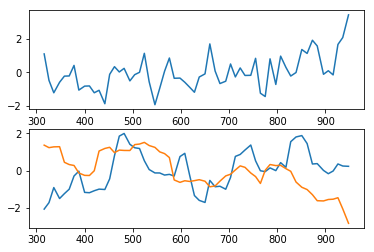

subject 28; gesture 2_1_2; avg 0.5656428843375287; sd 0.034480555471327994
subject 28; gesture 2_1_2; PoV: 0.8534404808800401


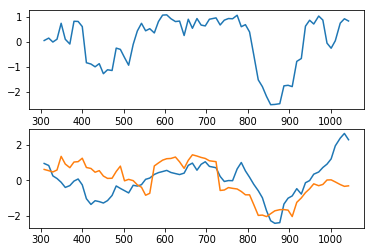

subject 28; gesture 2_1_1; avg 1.1438028635461892; sd 0.1305306382794955
subject 28; gesture 2_1_1; PoV: 0.8344285794252678


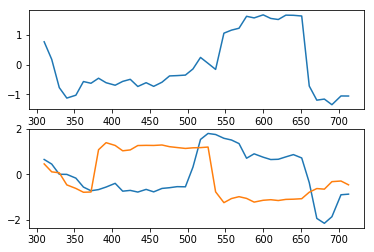

subject 12; gesture 2_0_1; avg 0.5740181869422207; sd 0.06217971648590459
subject 12; gesture 2_0_1; PoV: 0.8290123065832489


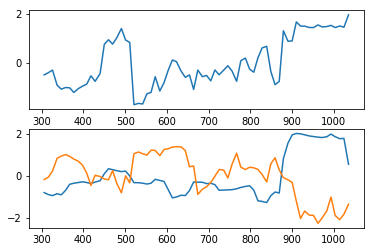

subject 12; gesture 2_0_2; avg 0.5965263208216622; sd 0.03376775744704642
subject 12; gesture 2_0_2; PoV: 0.8633274263823097


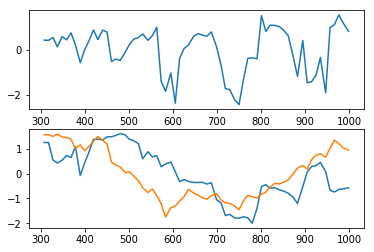

subject 12; gesture 2_1_2; avg 0.5590606794902999; sd 0.03511122214766256
subject 12; gesture 2_1_2; PoV: 0.8525680497646382


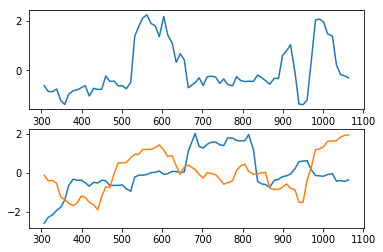

subject 12; gesture 2_1_1; avg 0.550935682857029; sd 0.044084105703573545
subject 12; gesture 2_1_1; PoV: 0.8365832967324183


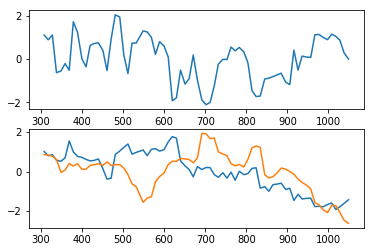

subject 19; gesture 2_0_1; avg 0.533538871289854; sd 0.024018744339468056
subject 19; gesture 2_0_1; PoV: 0.8695622524990497


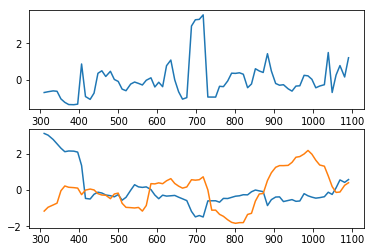

subject 19; gesture 2_0_2; avg 0.5814408550844926; sd 0.025871646419245723
subject 19; gesture 2_0_2; PoV: 0.8766795798387208


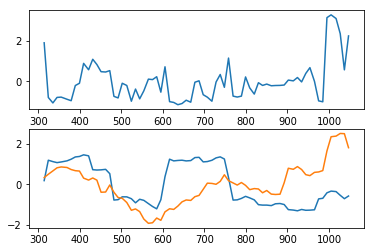

subject 19; gesture 2_1_2; avg 0.5603871401011133; sd 0.027520962077414095
subject 19; gesture 2_1_2; PoV: 0.8707002635999095


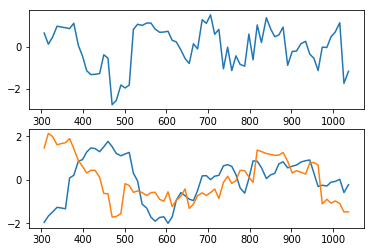

subject 19; gesture 2_1_1; avg 0.4855852697324742; sd 0.027671391924476405
subject 19; gesture 2_1_1; PoV: 0.8611232350648375


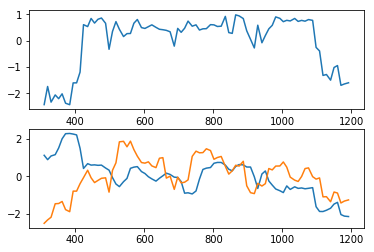

subject 07; gesture 2_0_1; avg 0.5287701105908091; sd 0.026057350698239758
subject 07; gesture 2_0_1; PoV: 0.8587300519846616


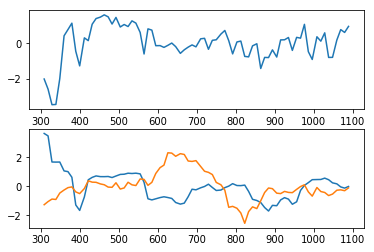

subject 07; gesture 2_0_2; avg 0.5102757779819633; sd 0.0340813683432687
subject 07; gesture 2_0_2; PoV: 0.8611931504570232


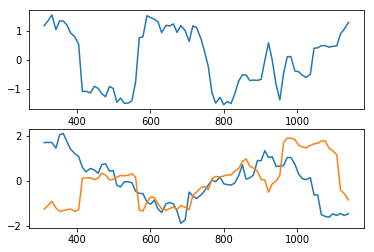

subject 07; gesture 2_1_2; avg 0.4754599389971652; sd 0.024439606783247834
subject 07; gesture 2_1_2; PoV: 0.8649144808893339


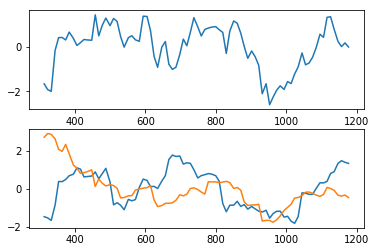

subject 07; gesture 2_1_1; avg 0.4977147883520557; sd 0.023646998439217182
subject 07; gesture 2_1_1; PoV: 0.8691321985404471


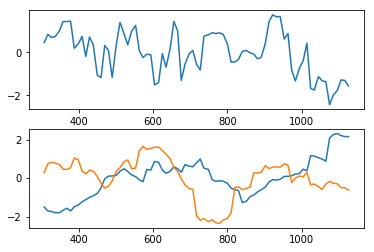

subject 20; gesture 2_0_1; avg 0.5491094118816144; sd 0.03345848842971212
subject 20; gesture 2_0_1; PoV: 0.8535153425301761


subject 20; gesture 2_0_2; avg 0.5127657338160494; sd 0.04366646016084805
subject 20; gesture 2_0_2; PoV: 0.8357990101625218


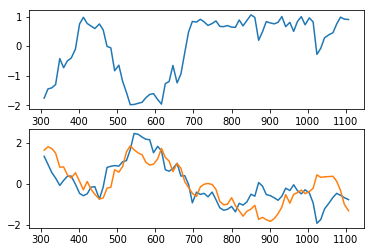

subject 20; gesture 2_1_2; avg 0.5496820770666104; sd 0.026939750647975817
subject 20; gesture 2_1_2; PoV: 0.8573411528883554


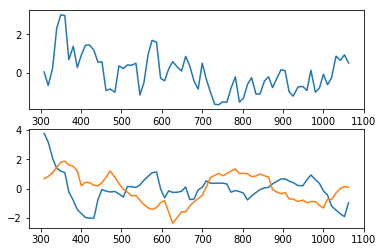

subject 20; gesture 2_1_1; avg 0.5419361280578945; sd 0.025403364394618252
subject 20; gesture 2_1_1; PoV: 0.8709252667088477


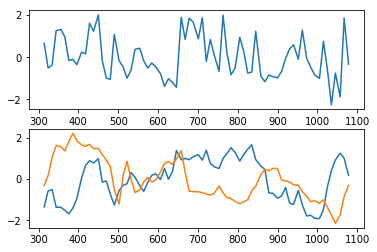

subject 31; gesture 2_0_1; avg 0.6494274325508111; sd 0.03127469098185135
subject 31; gesture 2_0_1; PoV: 0.8647110280332035


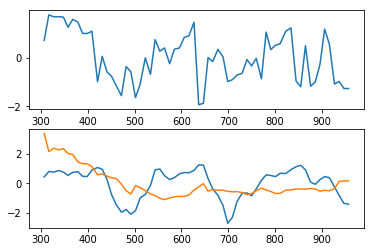

subject 31; gesture 2_0_2; avg 0.7063238553585969; sd 0.05042476537097515
subject 31; gesture 2_0_2; PoV: 0.8529731843330611


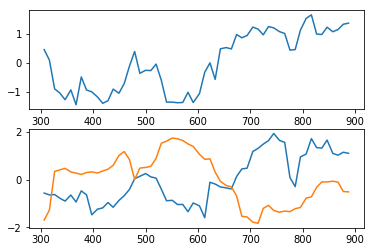

subject 31; gesture 2_1_2; avg 0.7975482416575405; sd 0.10189461121147116
subject 31; gesture 2_1_2; PoV: 0.8025865064620453


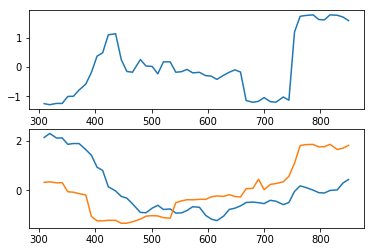

subject 31; gesture 2_1_1; avg 0.6066145918072294; sd 0.026811477697763427
subject 31; gesture 2_1_1; PoV: 0.8730212512928703


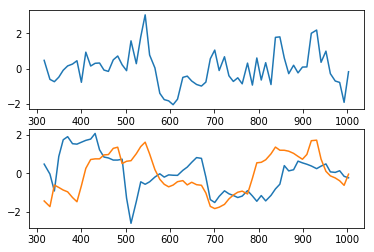

subject 13; gesture 2_0_1; avg 0.471758230675517; sd 0.022389230851092137
subject 13; gesture 2_0_1; PoV: 0.8720462657194202


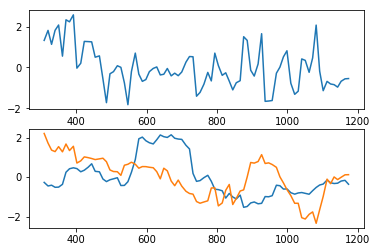

subject 13; gesture 2_0_2; avg 0.4392466550482566; sd 0.019970696040504044
subject 13; gesture 2_0_2; PoV: 0.8721109467918007


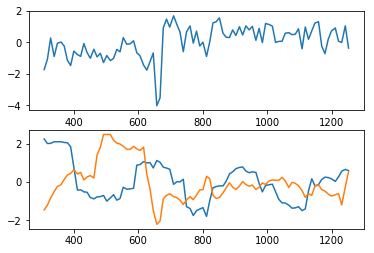

subject 13; gesture 2_1_2; avg 0.4369210538239283; sd 0.01962162500346577
subject 13; gesture 2_1_2; PoV: 0.8749293429807017


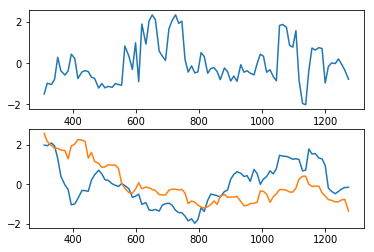

subject 13; gesture 2_1_1; avg 0.3894915873852907; sd 0.01864446571162503
subject 13; gesture 2_1_1; PoV: 0.8695265374890413


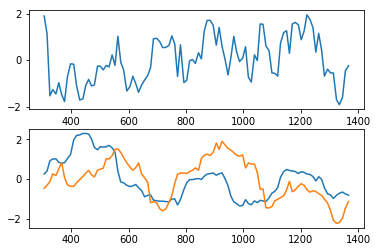

subject 36; gesture 2_0_1; avg 0.6743929313874932; sd 0.04073333756961244
subject 36; gesture 2_0_1; PoV: 0.8641594947864514


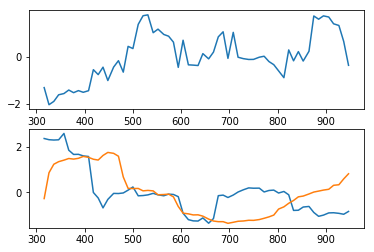

subject 36; gesture 2_0_2; avg 0.6616701784412898; sd 0.04837826545929986
subject 36; gesture 2_0_2; PoV: 0.8487001429991804


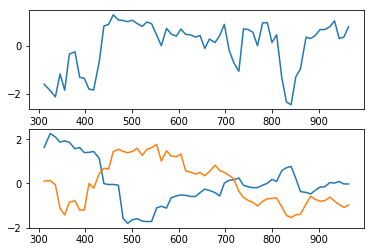

subject 36; gesture 2_1_2; avg 0.8067367110591905; sd 0.05218712275540632
subject 36; gesture 2_1_2; PoV: 0.8517007751751894


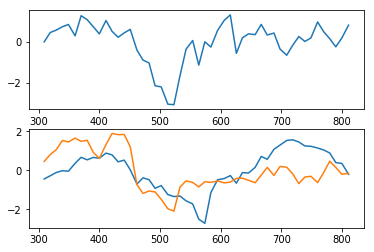

subject 36; gesture 2_1_1; avg 0.5773577793838737; sd 0.036982209214664975
subject 36; gesture 2_1_1; PoV: 0.8580489750623167


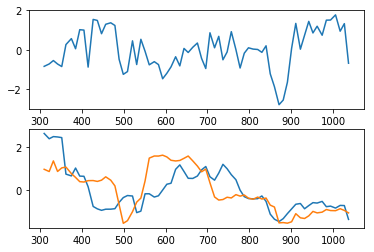

subject 24; gesture 2_0_1; avg 0.584112766286299; sd 0.1351669872134371
subject 24; gesture 2_0_1; PoV: 0.7427352919642701


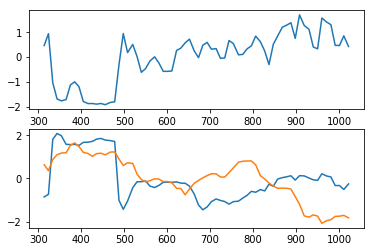

subject 24; gesture 2_0_2; avg 0.5155539700961427; sd 0.026944145926582563
subject 24; gesture 2_0_2; PoV: 0.8668798003743093


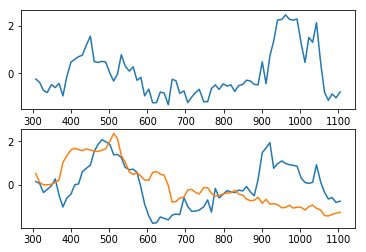

subject 24; gesture 2_1_2; avg 0.4796984667735443; sd 0.03830213693598439
subject 24; gesture 2_1_2; PoV: 0.8423652077619497


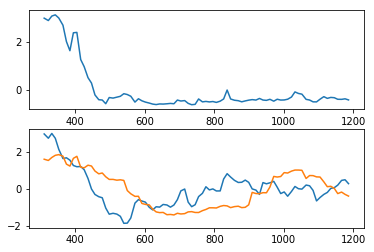

subject 24; gesture 2_1_1; avg 0.586188774555579; sd 0.04196127742725994
subject 24; gesture 2_1_1; PoV: 0.8534423948602117


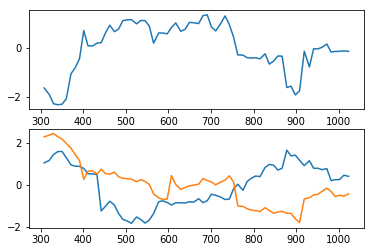

subject 33; gesture 2_0_1; avg 0.74970649030599; sd 0.047182158509706924
subject 33; gesture 2_0_1; PoV: 0.8505905515482488


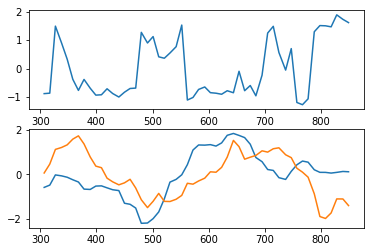

subject 33; gesture 2_0_2; avg 0.6052801990935084; sd 0.037756794314817786
subject 33; gesture 2_0_2; PoV: 0.8604054248238173


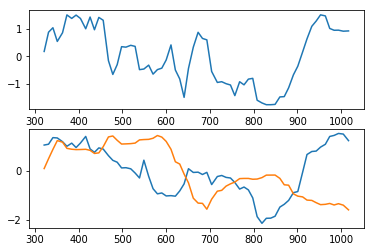

subject 33; gesture 2_1_2; avg 0.5803411579174308; sd 0.02802593165116594
subject 33; gesture 2_1_2; PoV: 0.8668234446509476


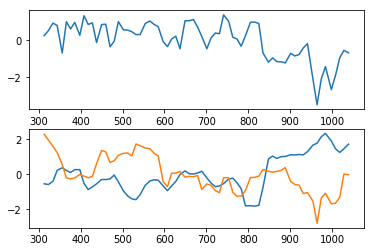

subject 33; gesture 2_1_1; avg 0.6293242328550732; sd 0.04093971996649774
subject 33; gesture 2_1_1; PoV: 0.8552377551451845


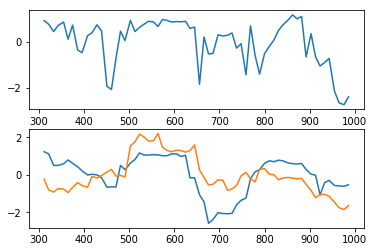

subject 11; gesture 2_0_1; avg 0.5185658266066899; sd 0.046230229560616835
subject 11; gesture 2_0_1; PoV: 0.8273368921097147


subject 11; gesture 2_0_2; avg 0.5162917865797884; sd 0.025529766393102962
subject 11; gesture 2_0_2; PoV: 0.864656847063053


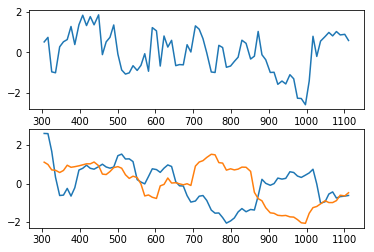

subject 11; gesture 2_1_2; avg 0.5502110504683086; sd 0.027890476082593613
subject 11; gesture 2_1_2; PoV: 0.8688494572795719


subject 11; gesture 2_1_1; avg 0.5401999616214352; sd 0.029540605559304642
subject 11; gesture 2_1_1; PoV: 0.8638295077882717


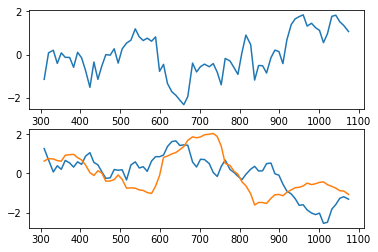

subject 35; gesture 2_0_1; avg 0.7249120082663298; sd 0.03632702221146255
subject 35; gesture 2_0_1; PoV: 0.8674893743633932


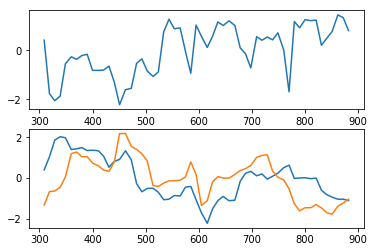

subject 35; gesture 2_0_2; avg 0.5901802766694801; sd 0.02643835163280108
subject 35; gesture 2_0_2; PoV: 0.8801839451237298


subject 35; gesture 2_1_2; avg 0.6401471832385471; sd 0.06600324990156016
subject 35; gesture 2_1_2; PoV: 0.8119709847304409


subject 35; gesture 2_1_1; avg 0.6493018093515616; sd 0.03420647978367705
subject 35; gesture 2_1_1; PoV: 0.8606394208497565


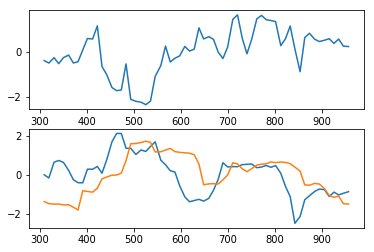

subject 22; gesture 2_0_1; avg 0.695364043847279; sd 0.04229400286718057
subject 22; gesture 2_0_1; PoV: 0.8522048660997849


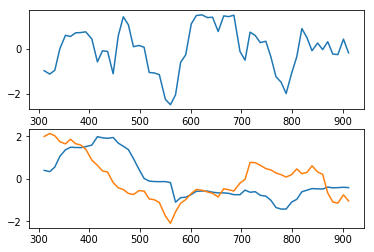

subject 22; gesture 2_0_2; avg 0.5417526653530996; sd 0.0418418371746866
subject 22; gesture 2_0_2; PoV: 0.8434805849533468


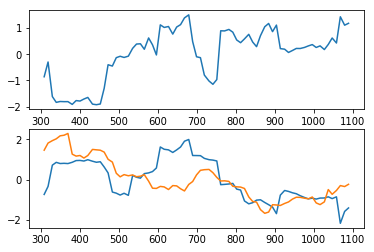

subject 22; gesture 2_1_2; avg 0.5727072030724087; sd 0.08911643092440324
subject 22; gesture 2_1_2; PoV: 0.7866509388001302


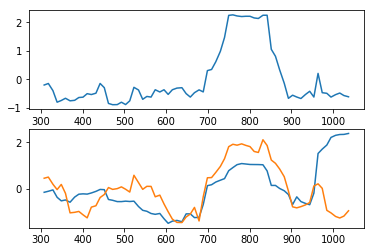

subject 22; gesture 2_1_1; avg 0.6061134328967094; sd 0.035403643561327226
subject 22; gesture 2_1_1; PoV: 0.8648975392506834


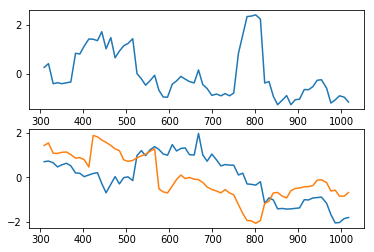

subject 34; gesture 2_0_1; avg 0.5857690114701796; sd 0.028405261161173985
subject 34; gesture 2_0_1; PoV: 0.8747377733616905


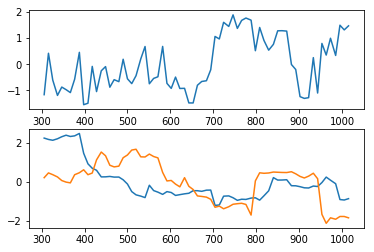

subject 34; gesture 2_0_2; avg 0.5479283791901398; sd 0.026126830605035026
subject 34; gesture 2_0_2; PoV: 0.8679612970896227


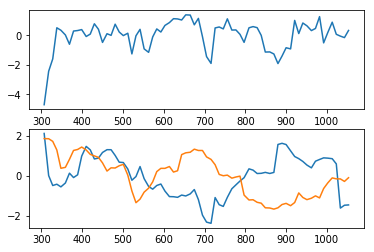

subject 34; gesture 2_1_2; avg 0.5531765284520179; sd 0.10488296474652972
subject 34; gesture 2_1_2; PoV: 0.7652172602499256


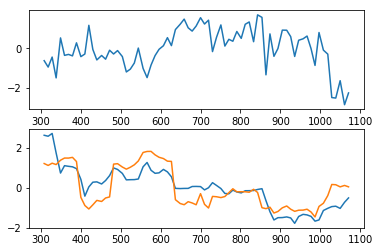

subject 34; gesture 2_1_1; avg 0.4341942496816732; sd 0.02451171892498675
subject 34; gesture 2_1_1; PoV: 0.8617945027190164


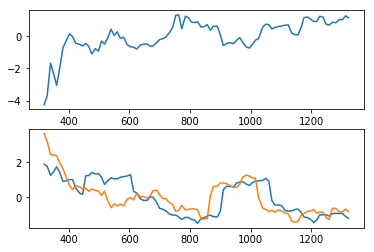

subject 10; gesture 2_0_1; avg 0.6219416732403916; sd 0.043480862757256385
subject 10; gesture 2_0_1; PoV: 0.8462675307015979


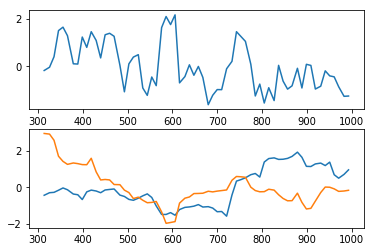

subject 10; gesture 2_0_2; avg 0.6490360635173235; sd 0.34427048657535225
subject 10; gesture 2_0_2; PoV: 0.6084330622036347


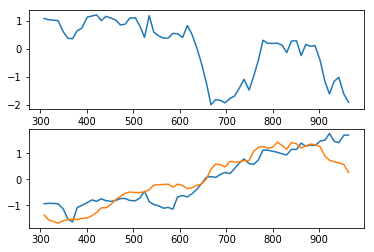

subject 10; gesture 2_1_2; avg 0.5492718411451979; sd 0.036221293573432574
subject 10; gesture 2_1_2; PoV: 0.8500439723910729


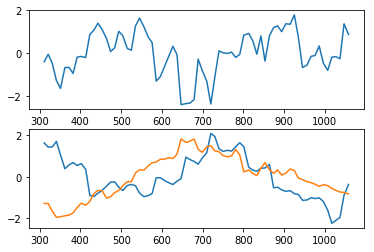

subject 10; gesture 2_1_1; avg 0.6248951143127369; sd 0.03854548849184432
subject 10; gesture 2_1_1; PoV: 0.8568238874262118


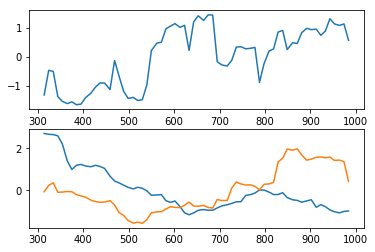

subject 02; gesture 2_0_1; avg 0.5873551631702824; sd 0.1285820458380785
subject 02; gesture 2_0_1; PoV: 0.7410033714577691


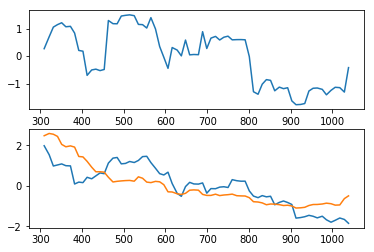

subject 02; gesture 2_0_2; avg 0.5901503265035399; sd 0.035252907465388346
subject 02; gesture 2_0_2; PoV: 0.8543814161708407


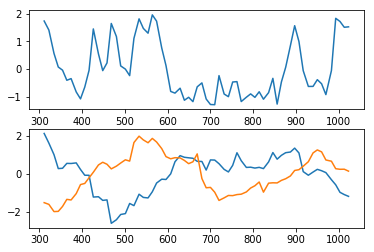

subject 02; gesture 2_1_2; avg 0.6289917295362406; sd 0.08224793407291944
subject 02; gesture 2_1_2; PoV: 0.80455845885696


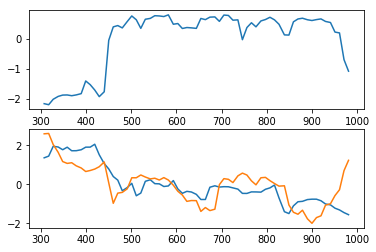

subject 02; gesture 2_1_1; avg 0.5446675872618525; sd 0.024707513435430824
subject 02; gesture 2_1_1; PoV: 0.8678065113886504


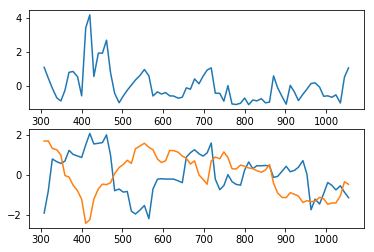

In [5]:
decomp_g2_syn = {}

for s, gdict in g2_dict_synerg.items():
    decomp_g2_syn[s] = {}
    for g, a in gdict.items():
        print(f"subject {s}; gesture {g}; avg {a.mean()}; sd {a.std()}")
        evals, evecs = la.eig(a)
        evals = evals.real
        sort_idx = np.argsort(-evals)
        evals = evals[sort_idx]
        evecs = evecs[:, sort_idx]
        # calc percent of variance explained
        print(f"subject {s}; gesture {g}; PoV: {evals[0].real / evals.real.sum()}")
        # do PCA
        res = a @ evecs[:, 0]
        res = scale(res.real)
        decomp_g2_syn[s][g] = res
        # plot results
        plt.subplot(211)
        plt.plot(dc.data_set_smooth[s][g][:,0], res)
        plt.subplot(212)
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,1])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,2])
        plt.show()

---

---

In [6]:
# average distance between all gestures in subject s cross subject v (cartesian product)
# i.e. average distance between subjects' gestures
compares = {}
for s1, gdict1 in decomp_g2_syn.items():
    compares[s1] = {}
    for s2, gdict2 in decomp_g2_syn.items():
        compares[s1][s2] = []
        for g1 in gdict1.values():
            for g2 in gdict2.values():
                compares[s1][s2].append(dtw(g1, g2))
        compares[s1][s2] = np.average(compares[s1][s2])

In [7]:
np.average([d for d in compares["30"].values()])

6.776242884607044